Лабораторная работа №2. Ионов Артем Юрьевич 6231-010402D

## Подключение необходимых библиотек

In [ ]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

import warnings

## Тестовый датафрейм "mpg"

In [ ]:
mpg

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       ...  
229  midsize  
230  midsize  
231  midsize  
232  midsize  
233  midsize  

[234 rows x 11 columns]

## Простейшая визуализация с использованиме geom_point по осям displ и hwy

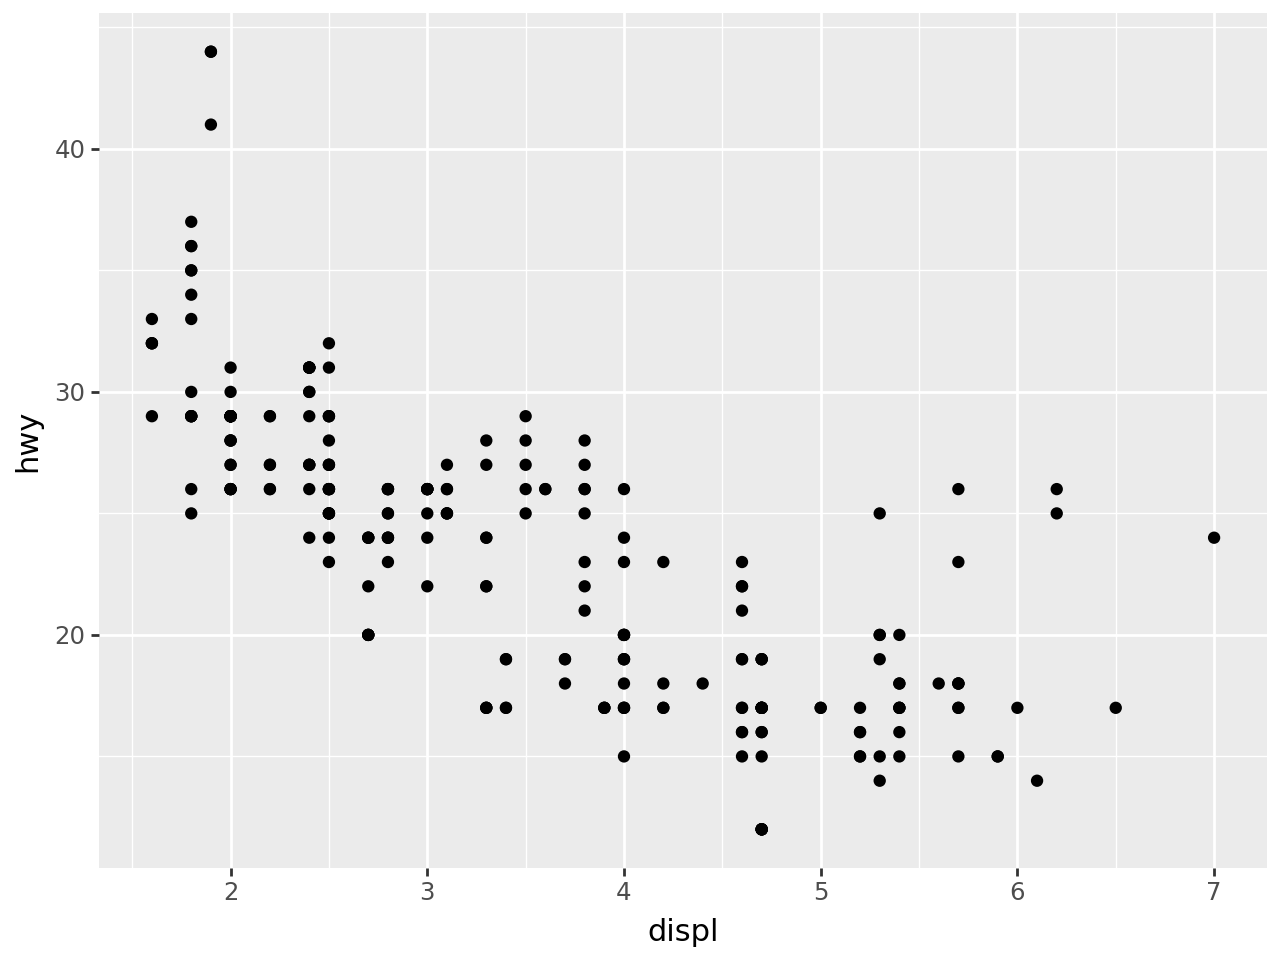

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"))

### Постройте два графика: в одном из них одна из осей должна быть соответствовать столбцу с элементами-категориями, во втором – обе (например, "class" и "drv")


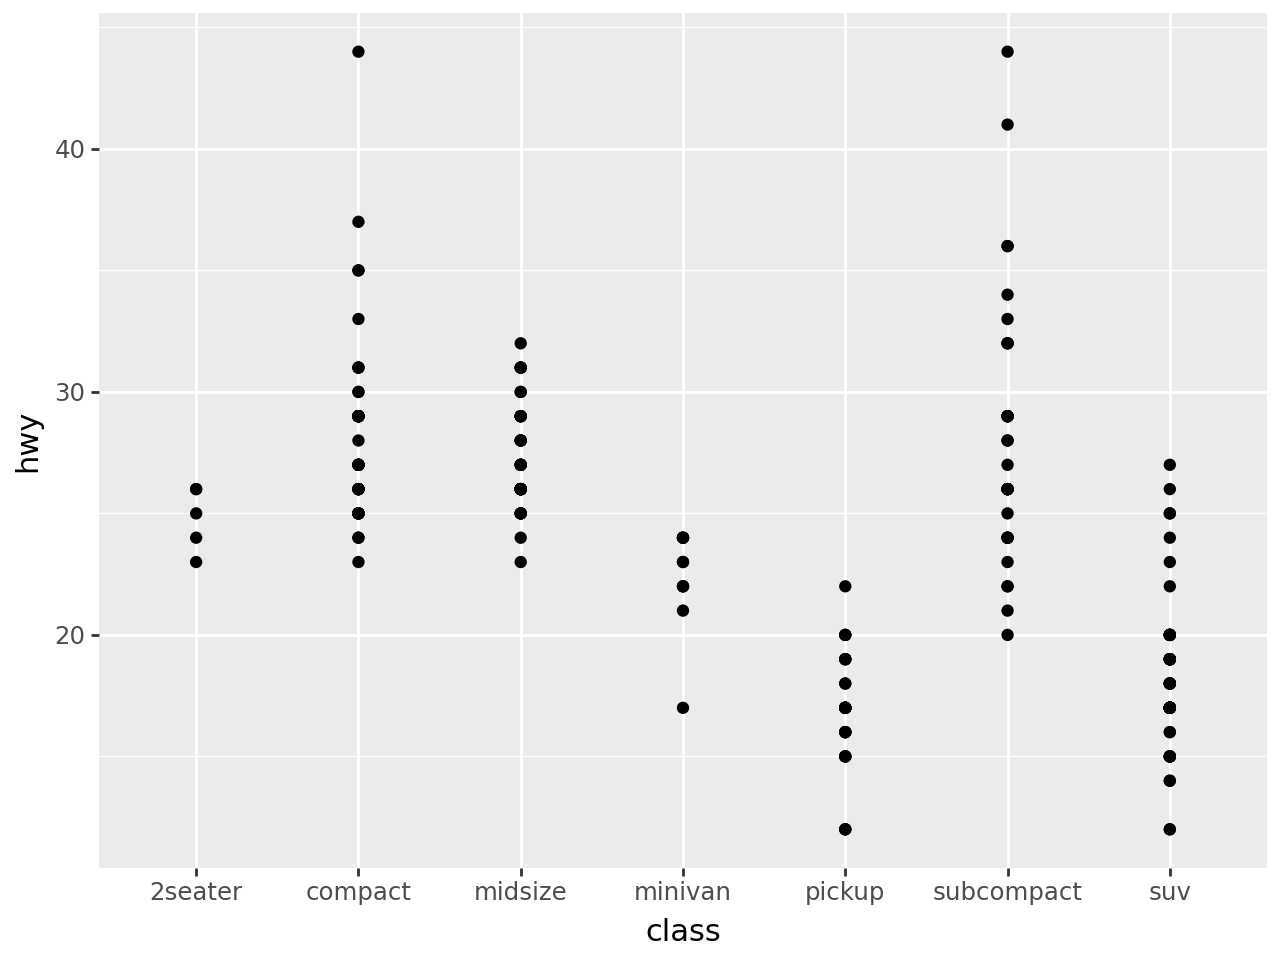

In [ ]:
# Одна из осей (в данном случае ось X) категориальная
ggplot(data=mpg) +\
geom_point(mapping=aes(x='class', y='hwy'))

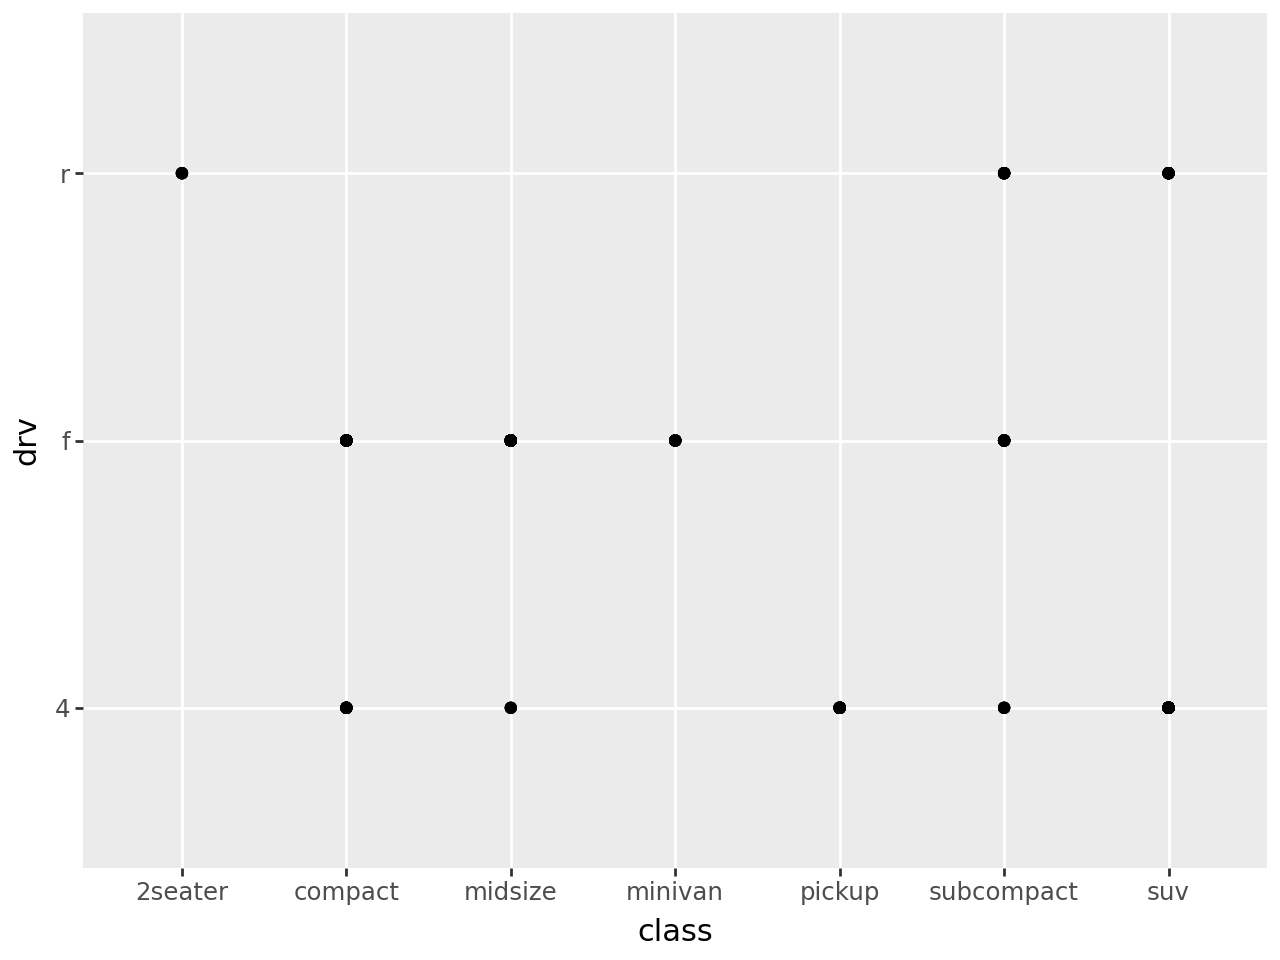

In [ ]:
# Обе оси категориальные
ggplot(data=mpg) +\
geom_point(mapping=aes(x='class', y='drv'))

## Добавим красок, оттенков и форм в графики

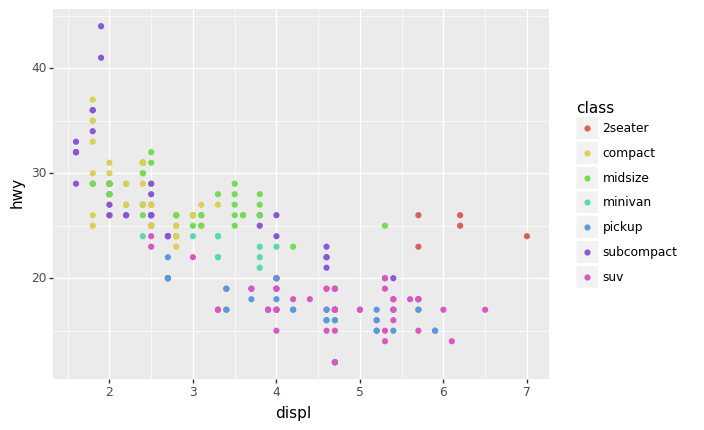

<ggplot: (-9223371871808279888)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", color="class"))

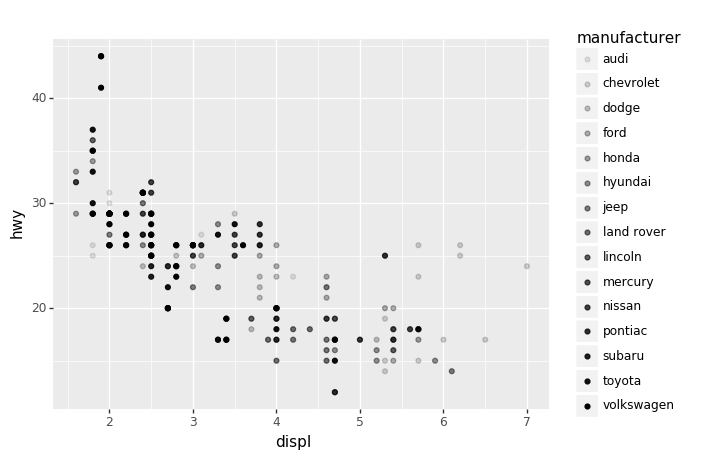

<ggplot: (-9223371871808766956)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", alpha="manufacturer"))

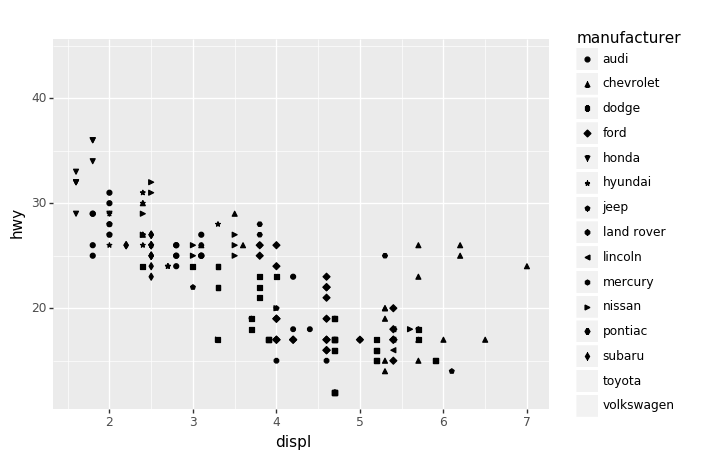

<ggplot: (-9223371871808170620)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy", shape="manufacturer"))

### Попробуйте сделать два графика: в одном размер точек будет соответствовать столбцу с элементами-категориями, во втором – столбцу с элементами-значениями

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_size.py:46: PlotnineWarning: Using size for a discrete variable is not advised.


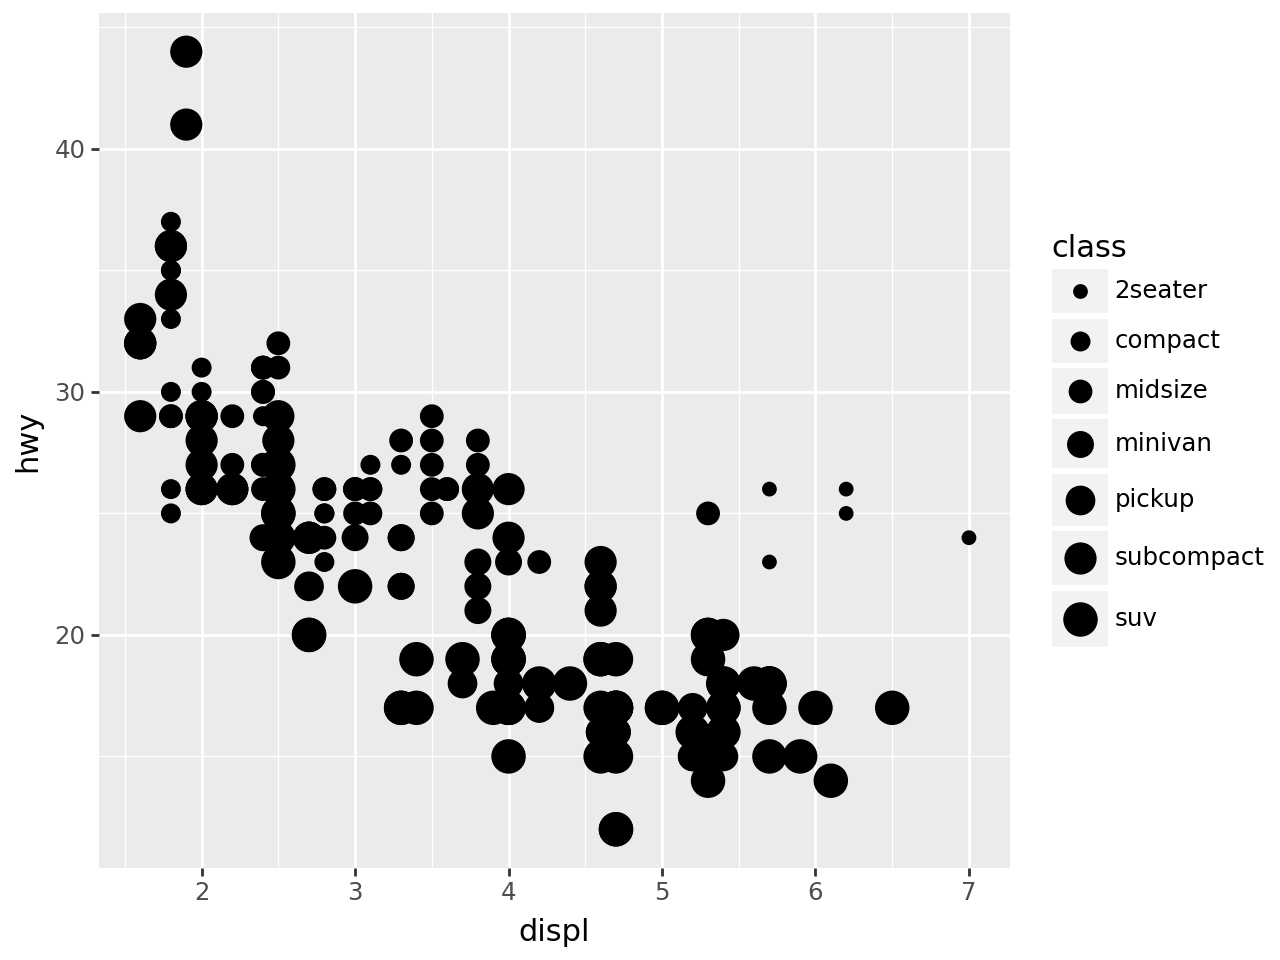

In [ ]:
# Размер точек зависит от категориального столбца "class"
ggplot(data=mpg) +\
geom_point(mapping=aes(x='displ', y='hwy', size='class'))

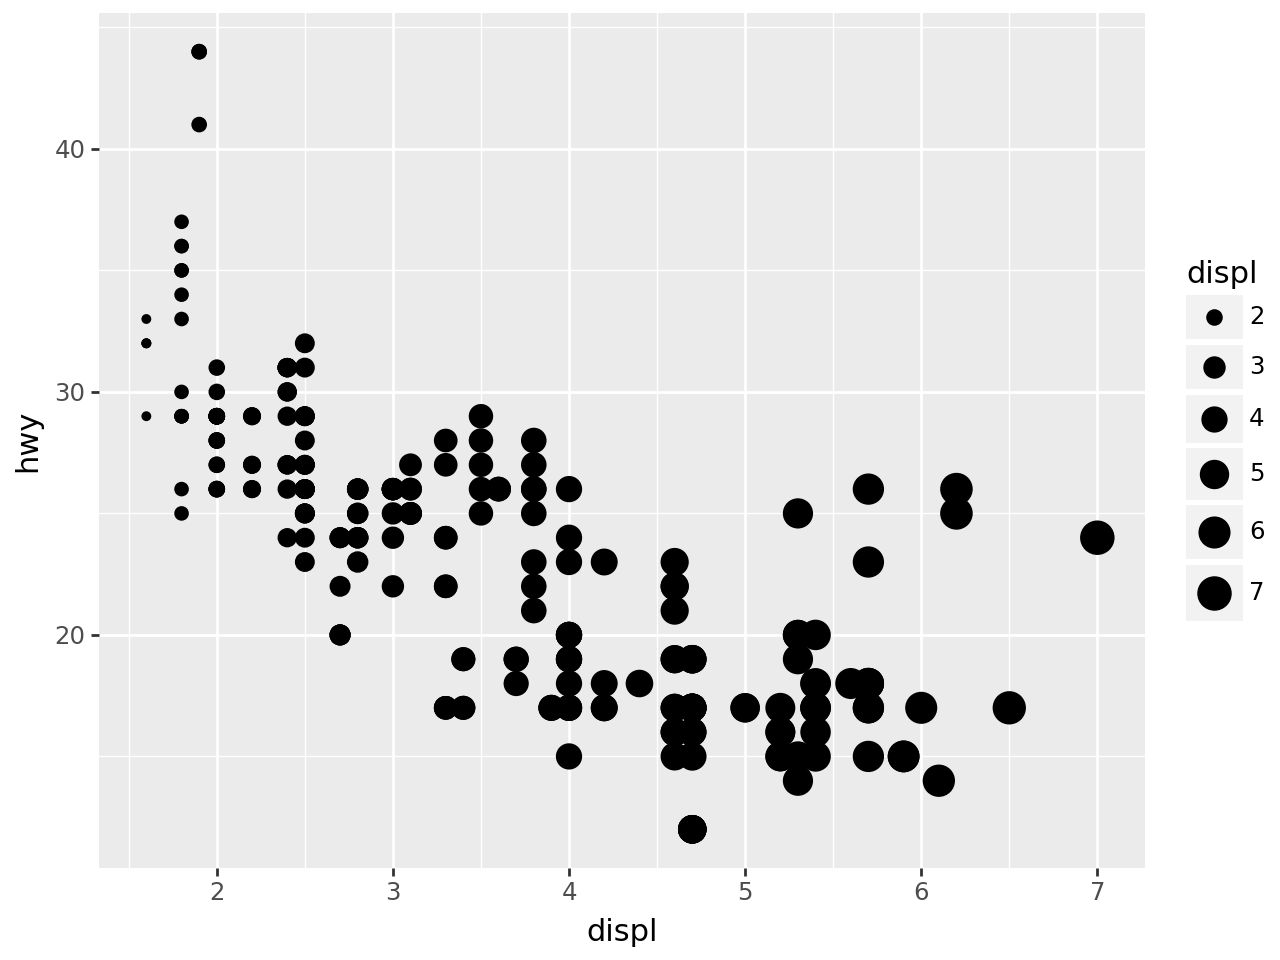

In [ ]:
# Размер точек зависит от числового столбца "displ"
ggplot(data=mpg) +\
geom_point(mapping=aes(x='displ', y='hwy', size='displ'))

## А что если сделать использовать в качестве источника визуального свойства "форма" непрерывную категорию (например hwy)?

In [ ]:
unique_values = mpg['hwy'].unique()
print(unique_values)

[29 31 30 26 27 25 28 24 23 20 15 17 19 14 22 21 18 12 16 33 32 34 36 35
 37 44 41]


ggplot2 (и plotnine) ожидает категориальные данные для shape. Нужно разделить непрерывную переменную на несколько категорий (например, на основе интервалов значений)

In [ ]:
mpg['hwy_category'] = pd.cut(mpg['hwy'], bins=3, labels=["Low", "Medium", "High"])

In [ ]:
unique_values = mpg['hwy_category'].unique()
print(unique_values)

['Medium', 'Low', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']


Поробуем построить еще раз, только уже используя новую переменную

/usr/local/lib/python3.10/dist-packages/plotnine/scales/scale_shape.py:82: PlotnineWarning: Using shapes for an ordinal variable is not advised.


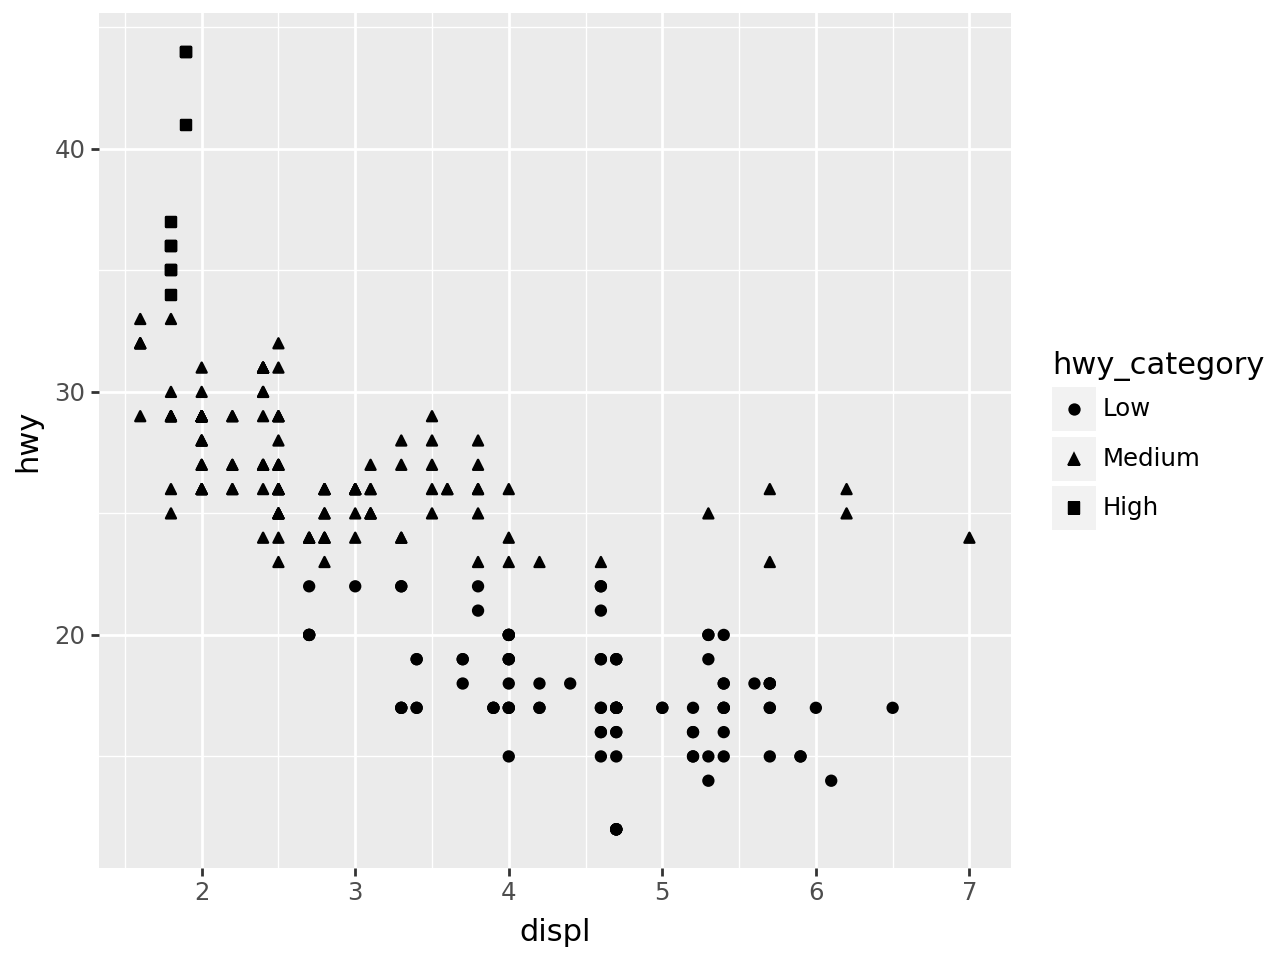

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x='displ', y='hwy', shape='hwy_category'))

### Попробуйте сделать график с визуальным элементом, заданным условным оператором (например, color="displ < 5")

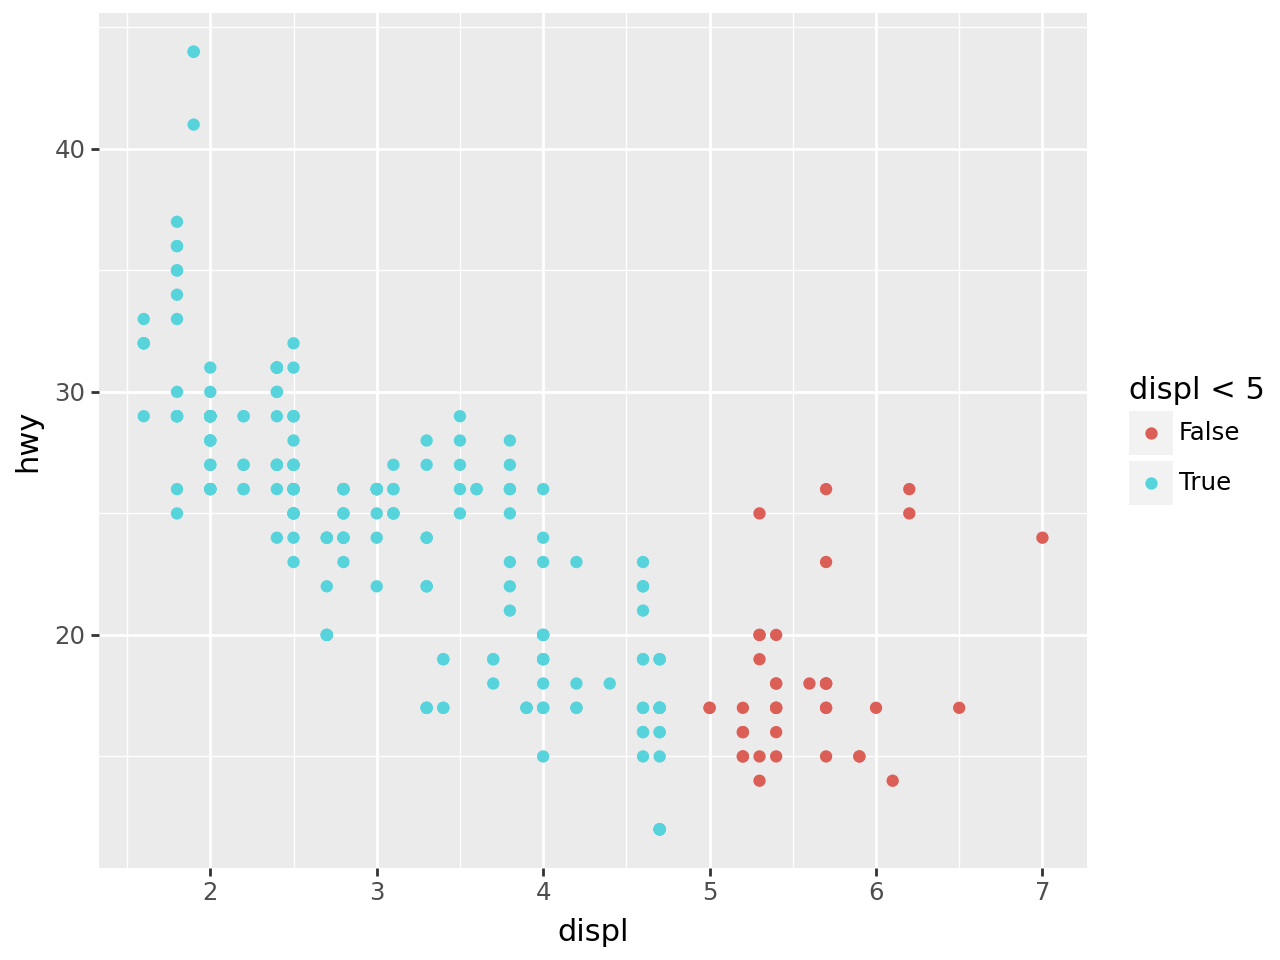

In [ ]:
# Type your code here...
ggplot(data=mpg) +\
geom_point(mapping=aes(x='displ', y='hwy', color='displ < 5'))

### Попробуйте поэкспериментировать с графиками, где одной категории соответствуют различные визуальные элементы (пример ниже). Попробуйте привести пример, когда это имеет смысл.

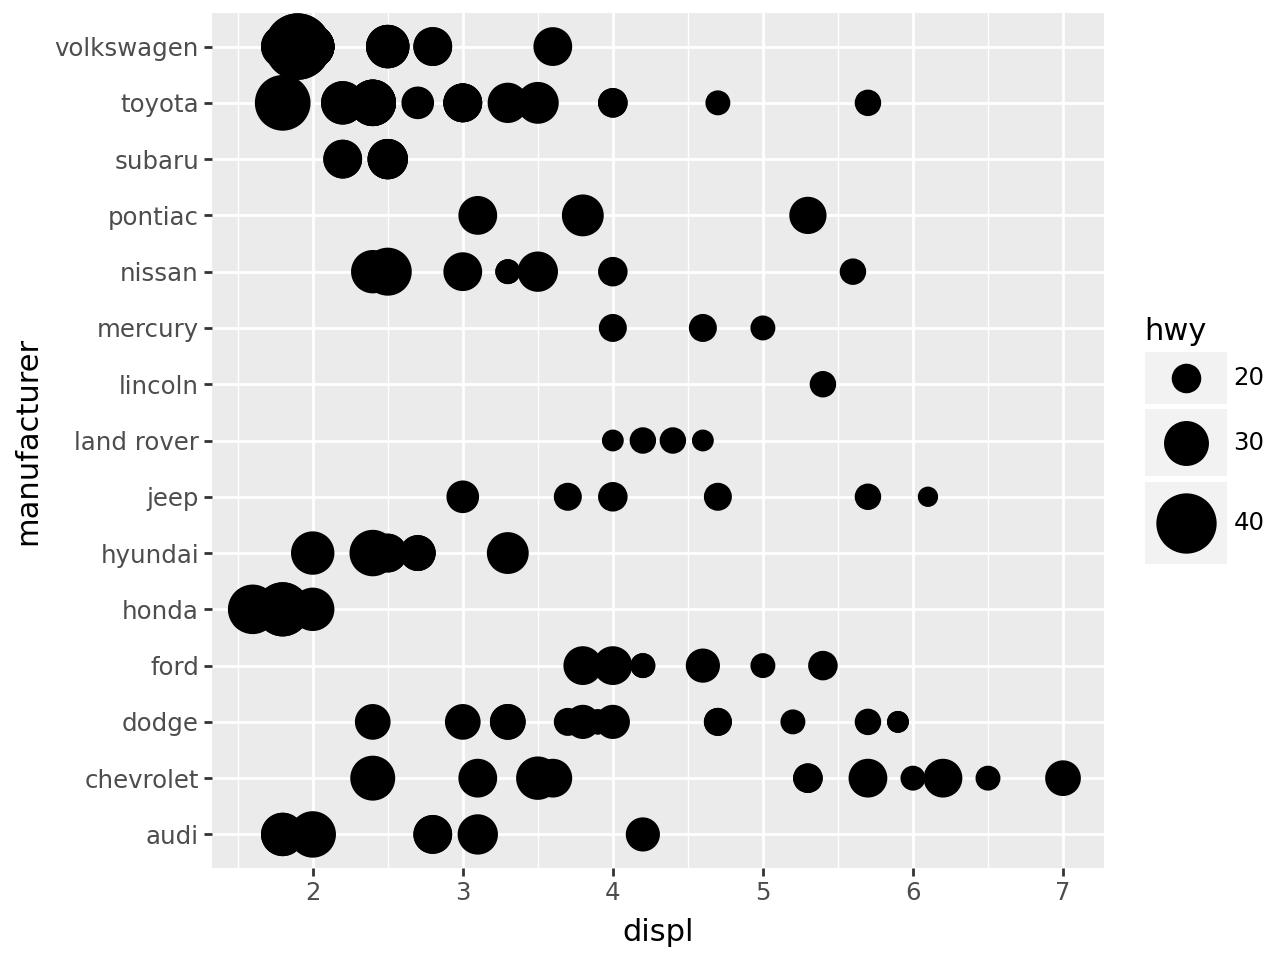

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="manufacturer", stroke="hwy"))

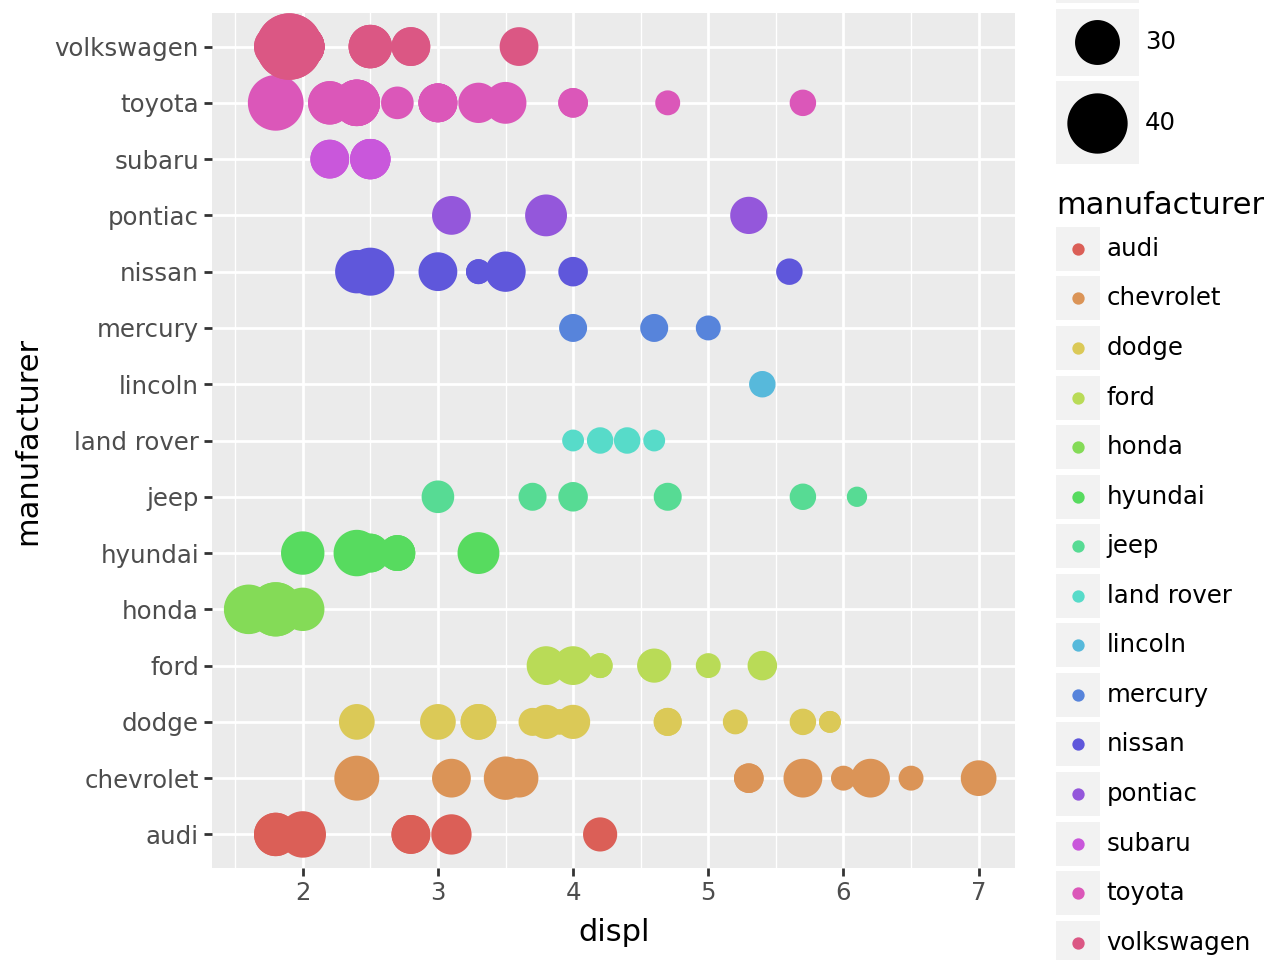

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="manufacturer", stroke="hwy", color="manufacturer"))

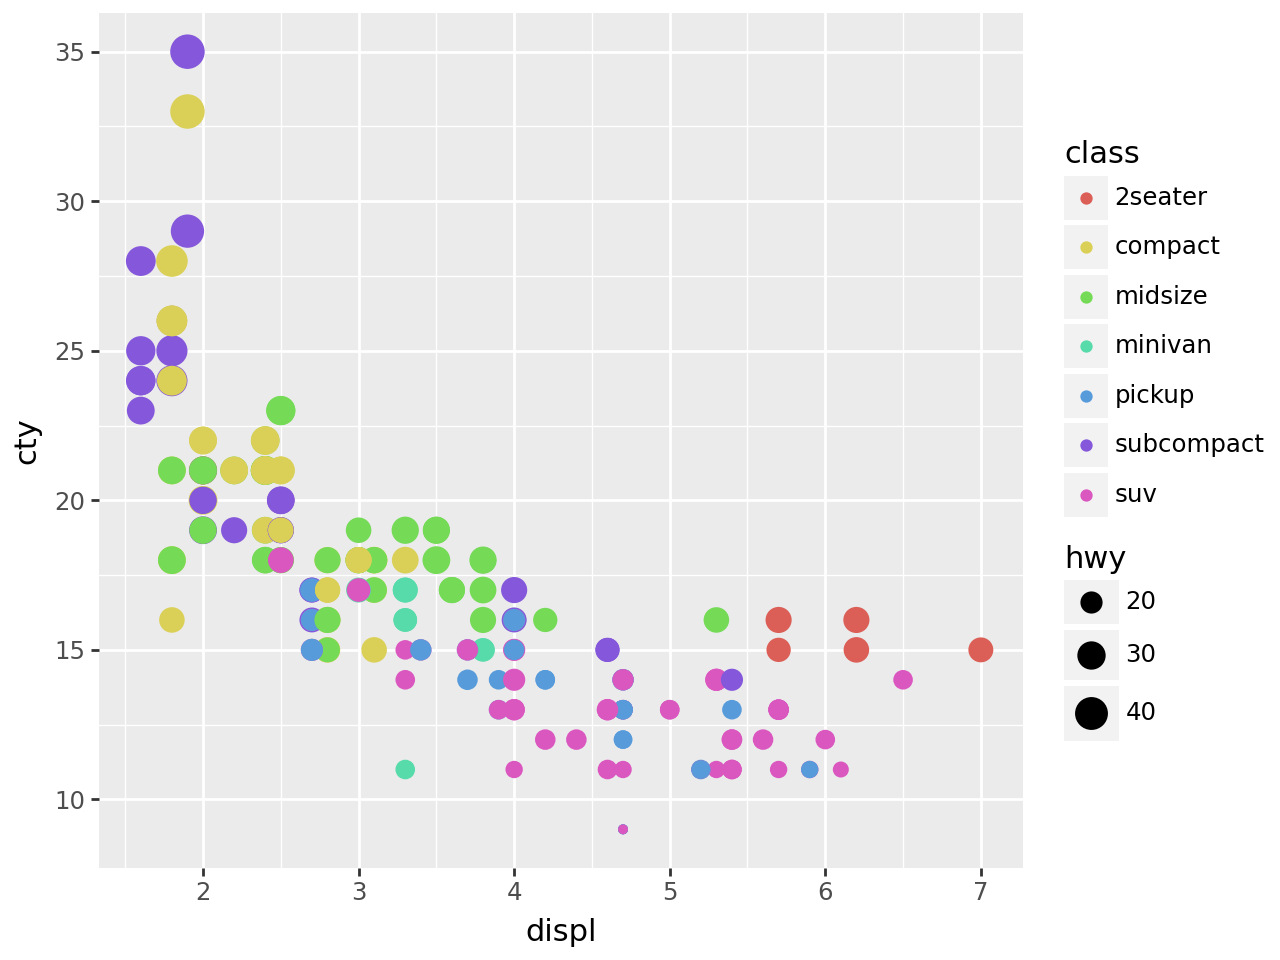

In [ ]:
# class (класс автомобиля), и размер для количественной переменной hwy
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="cty", color="class", size="hwy"))

Это позволяет увидеть, как класс автомобиля  соотносится с расходом топлива в городе (cty) и на шоссе (hwy).

## Использование панелей при визуализации

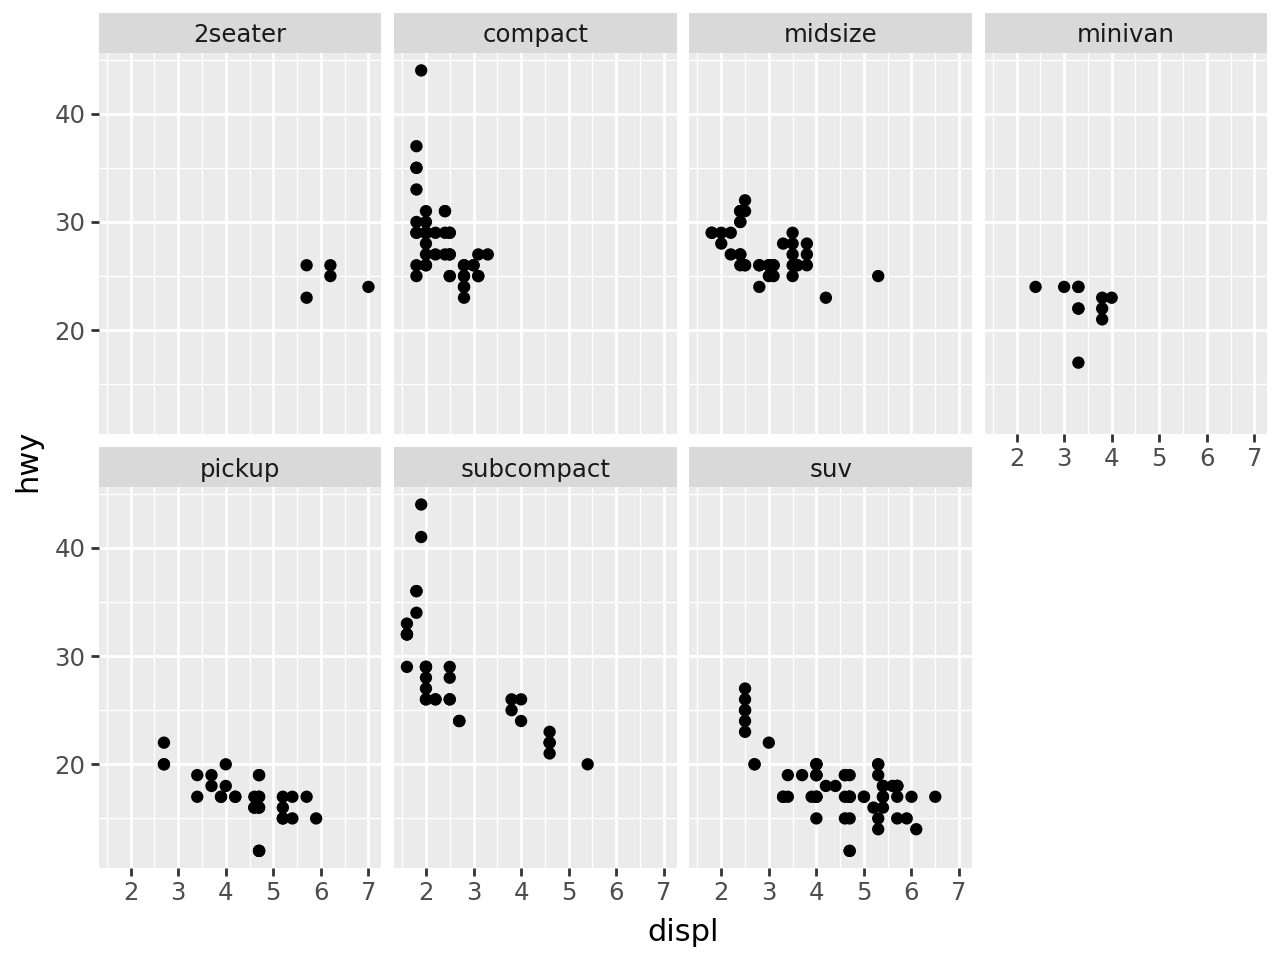

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
facet_wrap("class", nrow=2)

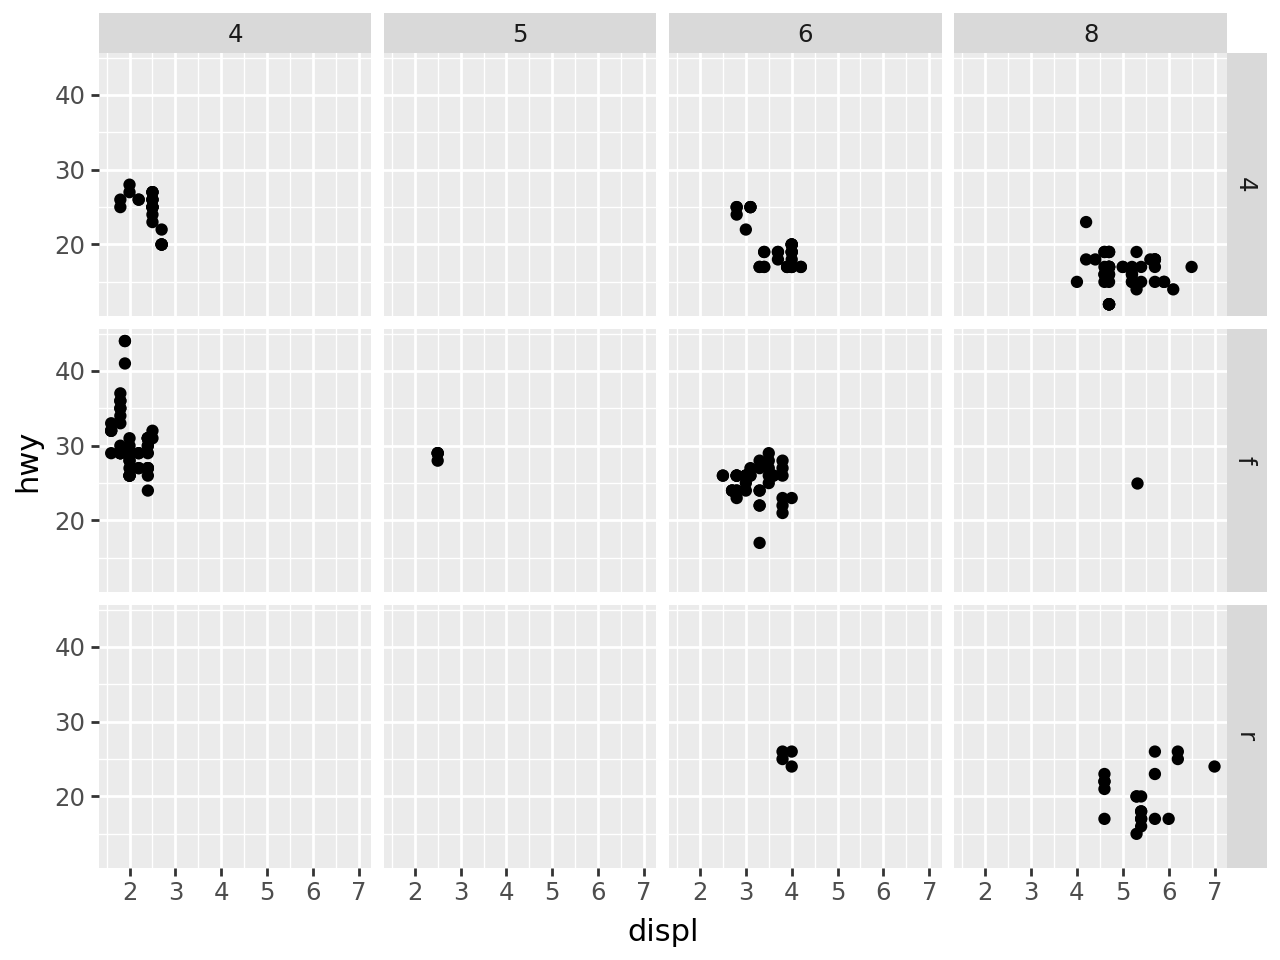

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy")) +\
facet_grid("drv ~ cyl")

### Что если использовать категорию с непрерывными значениями (например, hwy) для разделения на панели?

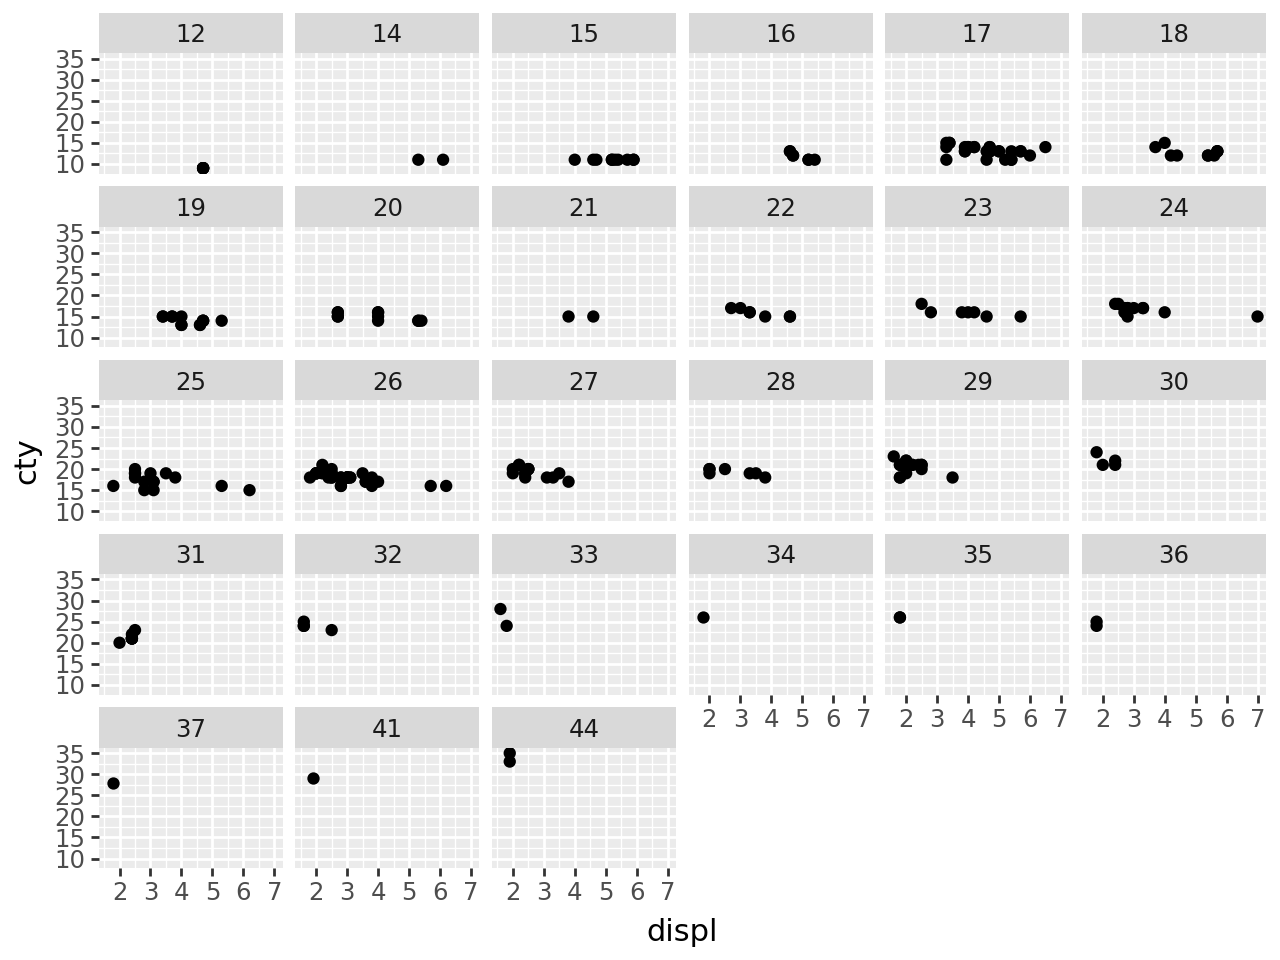

In [ ]:
ggplot(data=mpg) + \
geom_point(mapping=aes(x="displ", y="cty")) + \
facet_wrap("hwy")

Я решил попробовать еще так, равномерное распределение данных между категориями:

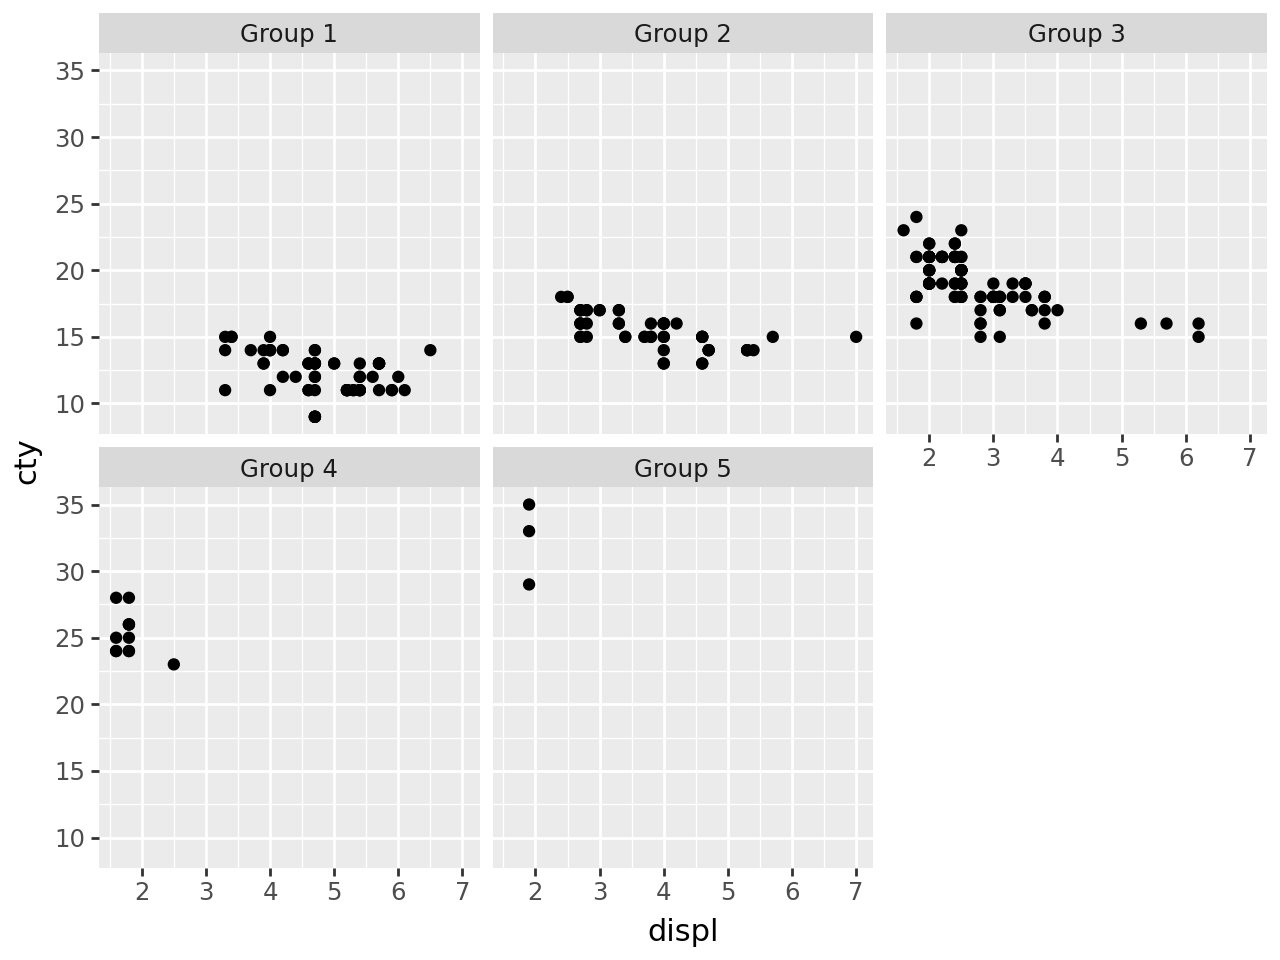

In [ ]:
# Преобразуем переменную hwy в категории
mpg['hwy_category'] = pd.cut(mpg['hwy'], bins=5, labels=[f"Group {i}" for i in range(1, 6)])


ggplot(data=mpg) + \
geom_point(mapping=aes(x="displ", y="cty")) + \
facet_wrap("hwy_category")


### Можно сделать только вертикальные или только горизонтальные панели, если использовать конструкцию типа (". ~ <категория>")

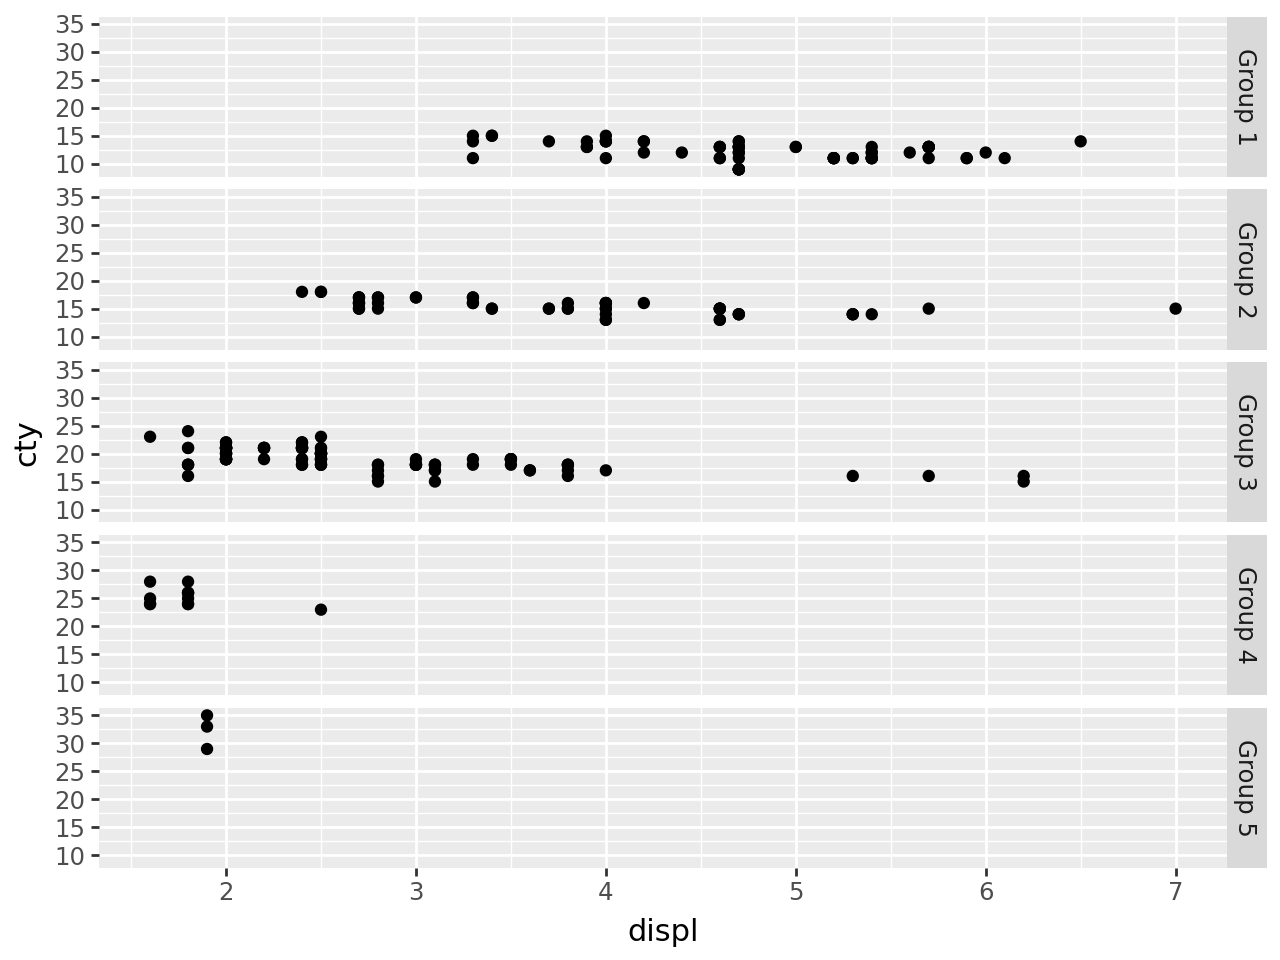

In [ ]:
# Пример с вертикальными панелями:
ggplot(data=mpg) + \
geom_point(mapping=aes(x="displ", y="cty")) + \
facet_grid("hwy_category ~ .")

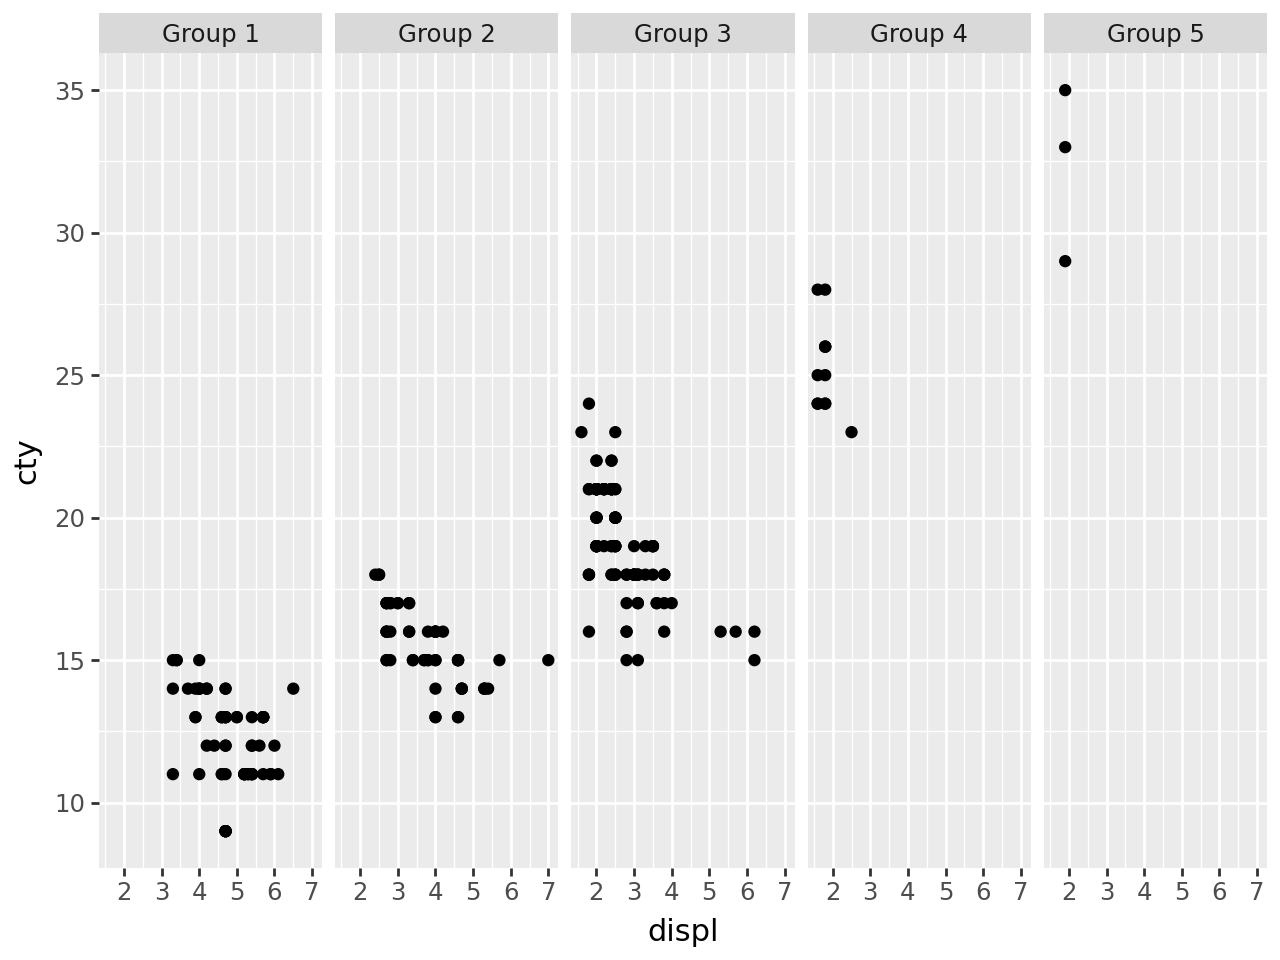

In [ ]:
# Построим график с горизонтальными панелями
ggplot(data=mpg) + \
geom_point(mapping=aes(x="displ", y="cty")) + \
facet_grid(". ~ hwy_category")

### Что лучше использовать: цвета или панели? А для большого набора?

Для небольшого набора я думаю что лучше будут цвета;
Когда категории нужно на одном графике отобразить чтобы сравнить их.

Панели лучше будут если нужно выделить категории в отдельные графики и сравить между собой.

Для большого набора возможно лучше будет комбинация одного и другого.

## geom_smooth() позволяет получить сглаженную среднюю (в том числе, с доверительным интервалом).abs
### (это не сработает без библиотеки scikit-misc, и может не сработать даже с ней)

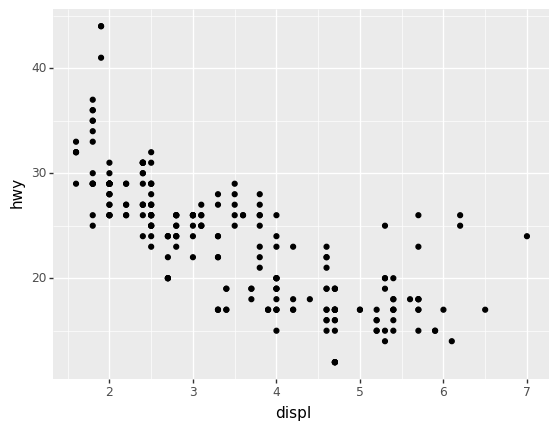

<ggplot: (-9223371871807518736)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"))

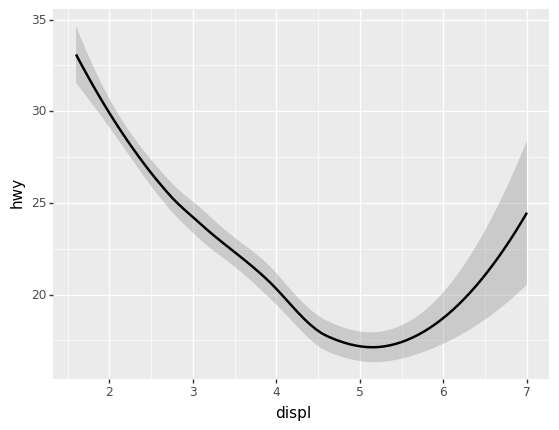

<ggplot: (-9223371871807511032)>

In [ ]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy"))

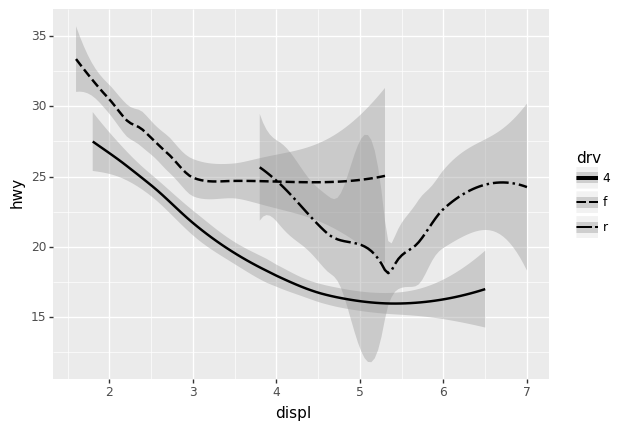

<ggplot: (-9223371871808182848)>

In [ ]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy", linetype="drv"))

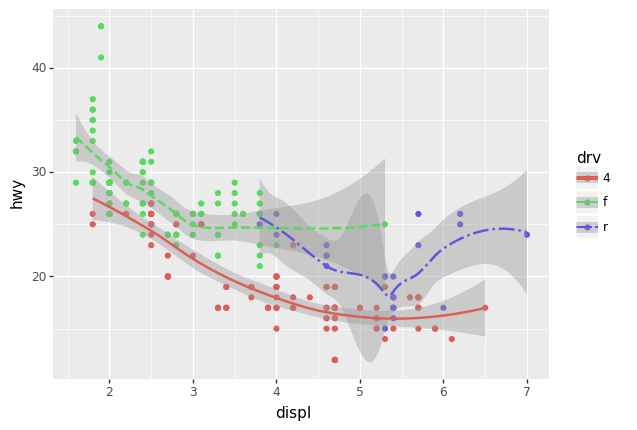

<ggplot: (-9223371871807172476)>

In [ ]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy", color="drv")) +\
geom_point() +\
geom_smooth(mapping=aes(linetype="drv"))

## Визуальные отображения в функции ggplot будут распространяться на все графики. Отдельные свойства каждого геометрического отображения будут относиться только к нему.

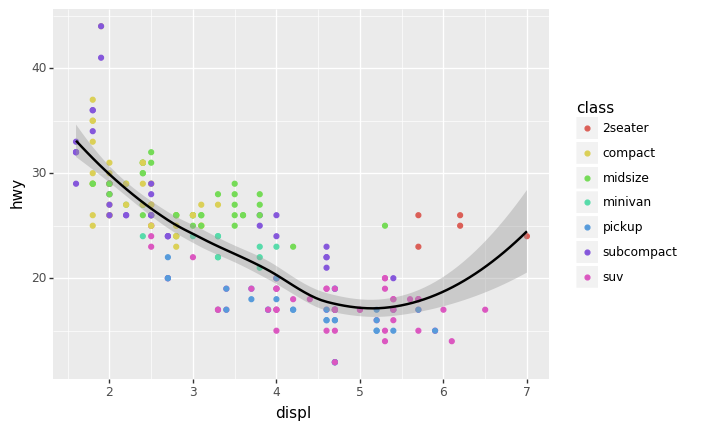

<ggplot: (-9223371871807386280)>

In [ ]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(mapping=aes(color="class")) +\
geom_smooth()

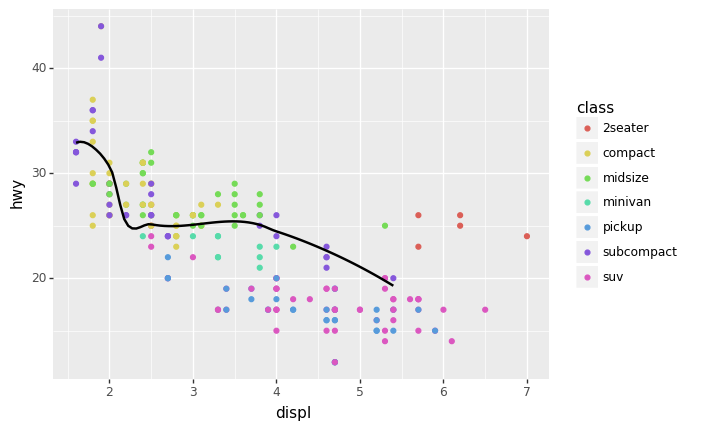

<ggplot: (-9223371871807266692)>

In [ ]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(mapping=aes(color="class")) +\
geom_smooth(data=mpg.loc[mpg["class"] == "subcompact"], se=False)

## Попробуйте скомбинировать разные свойства разных слоёв

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


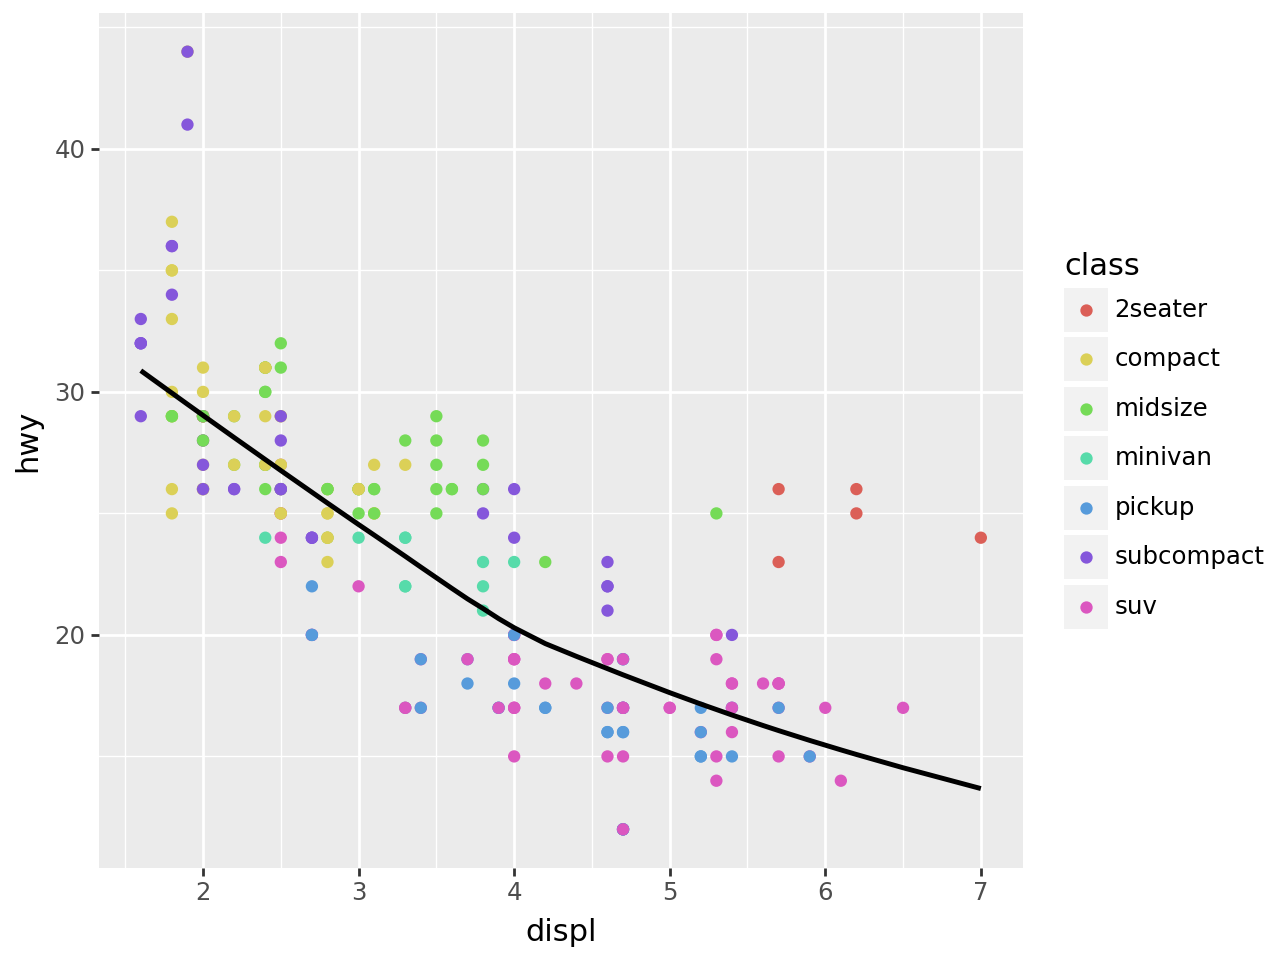

In [ ]:
# Сглаживание для всех данных и
# точечный график по категориям
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) + \
geom_point(mapping=aes(color="class")) + \
geom_smooth(se=True)  # Сглаживание с доверительным интервалом


Использование разных типов линий и цветов для различных категорий

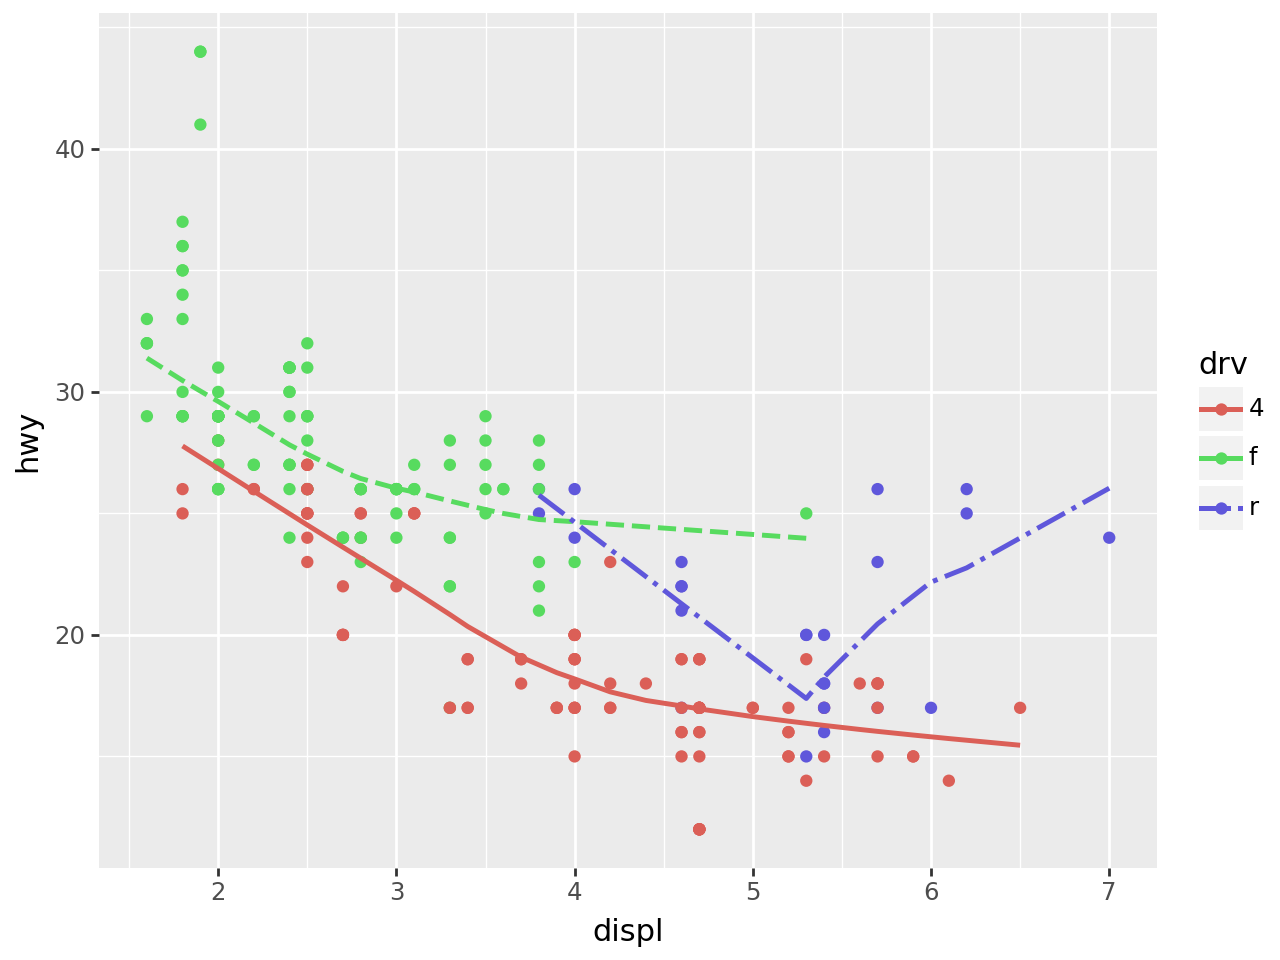

In [ ]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) + \
    geom_point(mapping=aes(color="drv")) + \
    geom_smooth(mapping=aes(linetype="drv", color="drv"), se=False)  # Сглаживание по категориям drv


# Какое геометрическое отображение вы будете использовать, чтобы нарисовать линейную диаграмму (обычный линейный график)?

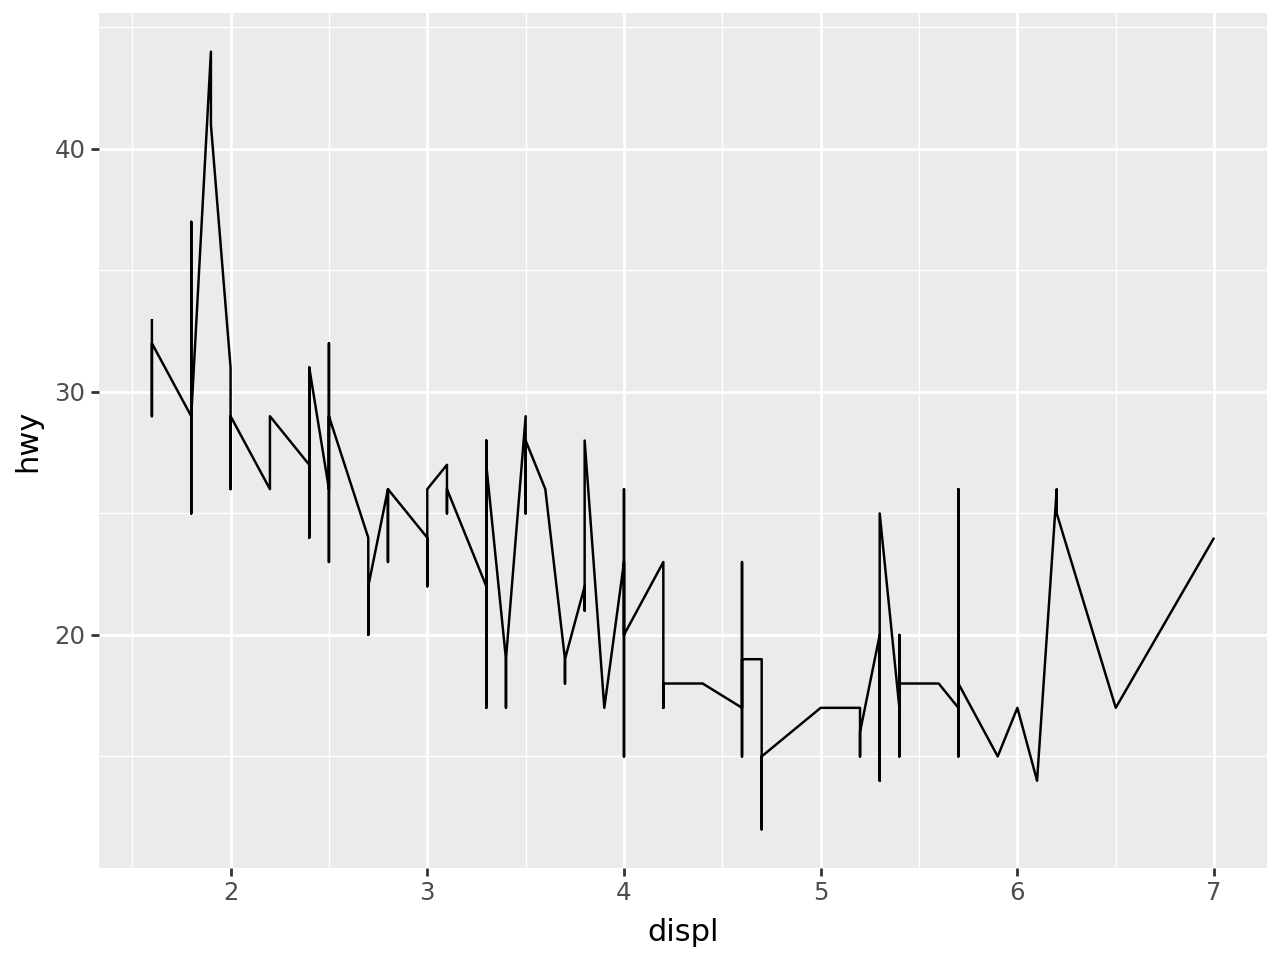

In [ ]:
# Type your code here...
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) + \
geom_line()

### Подберите подходящий код под следующие графики:


In [ ]:
pip install scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
from plotnine import ggplot, aes, geom_point, geom_smooth

Изображения почему то не открывались, поэтому я их вставил сам по новой

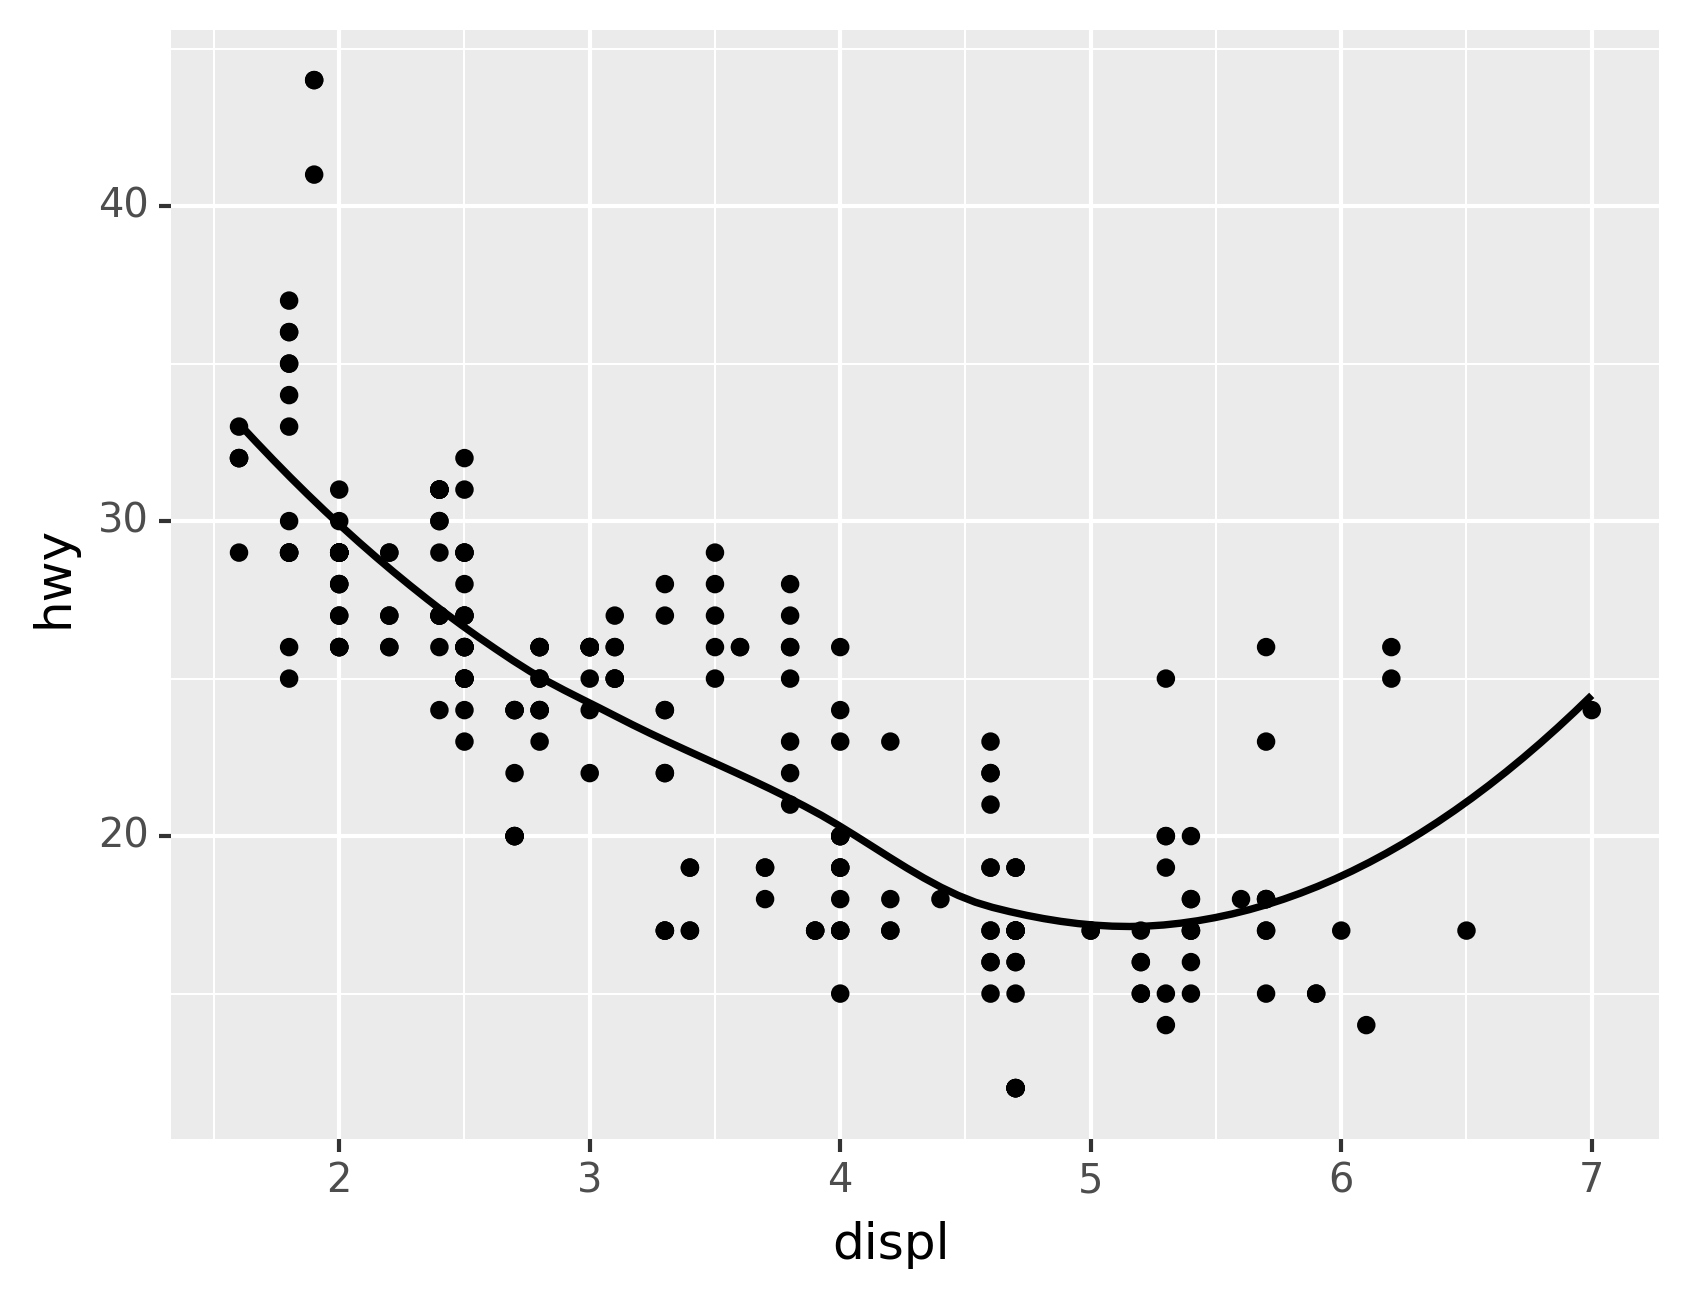

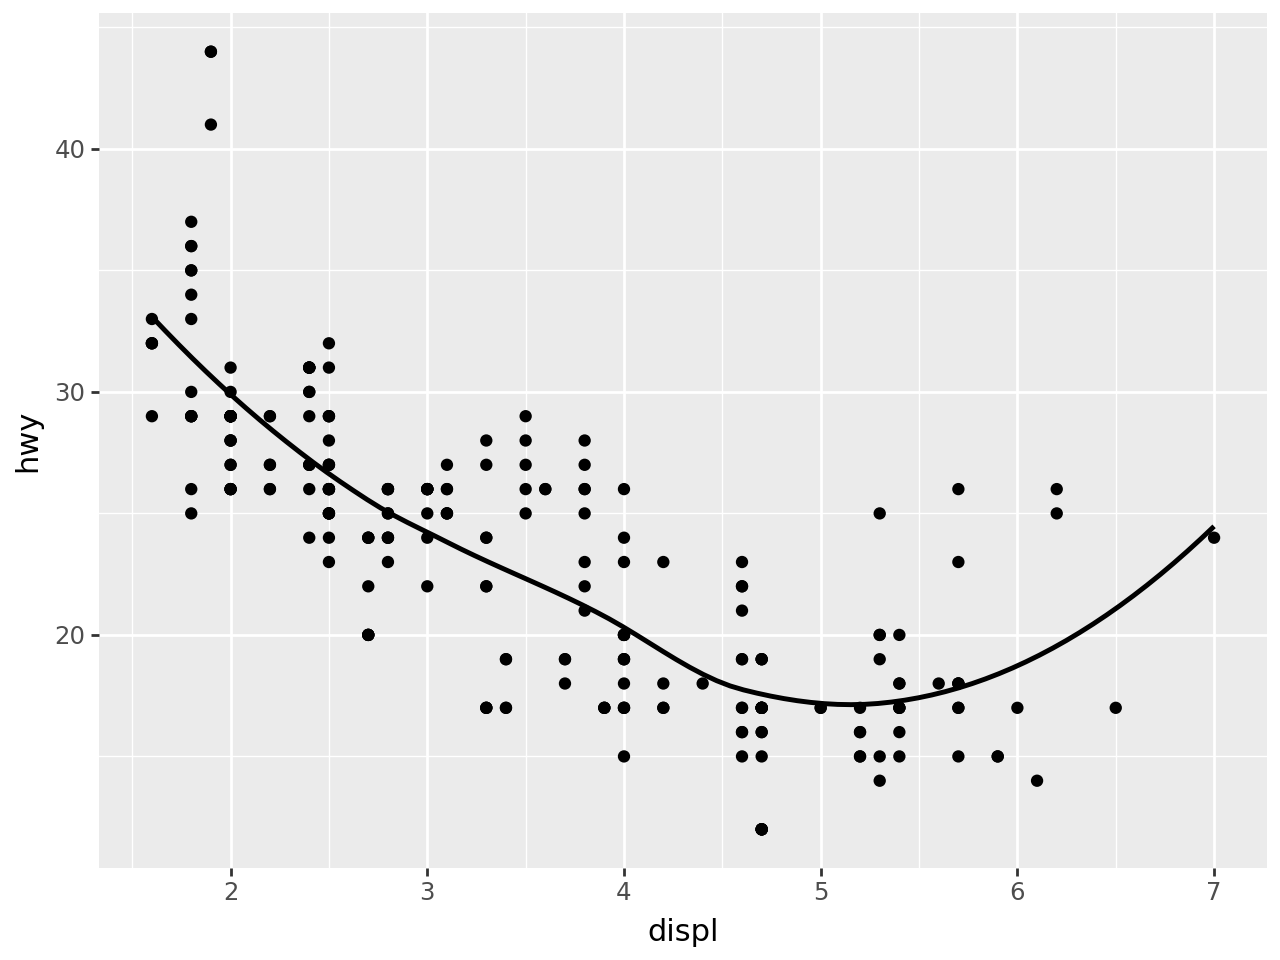

In [ ]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) + \
geom_point() + \
geom_smooth(se=False)

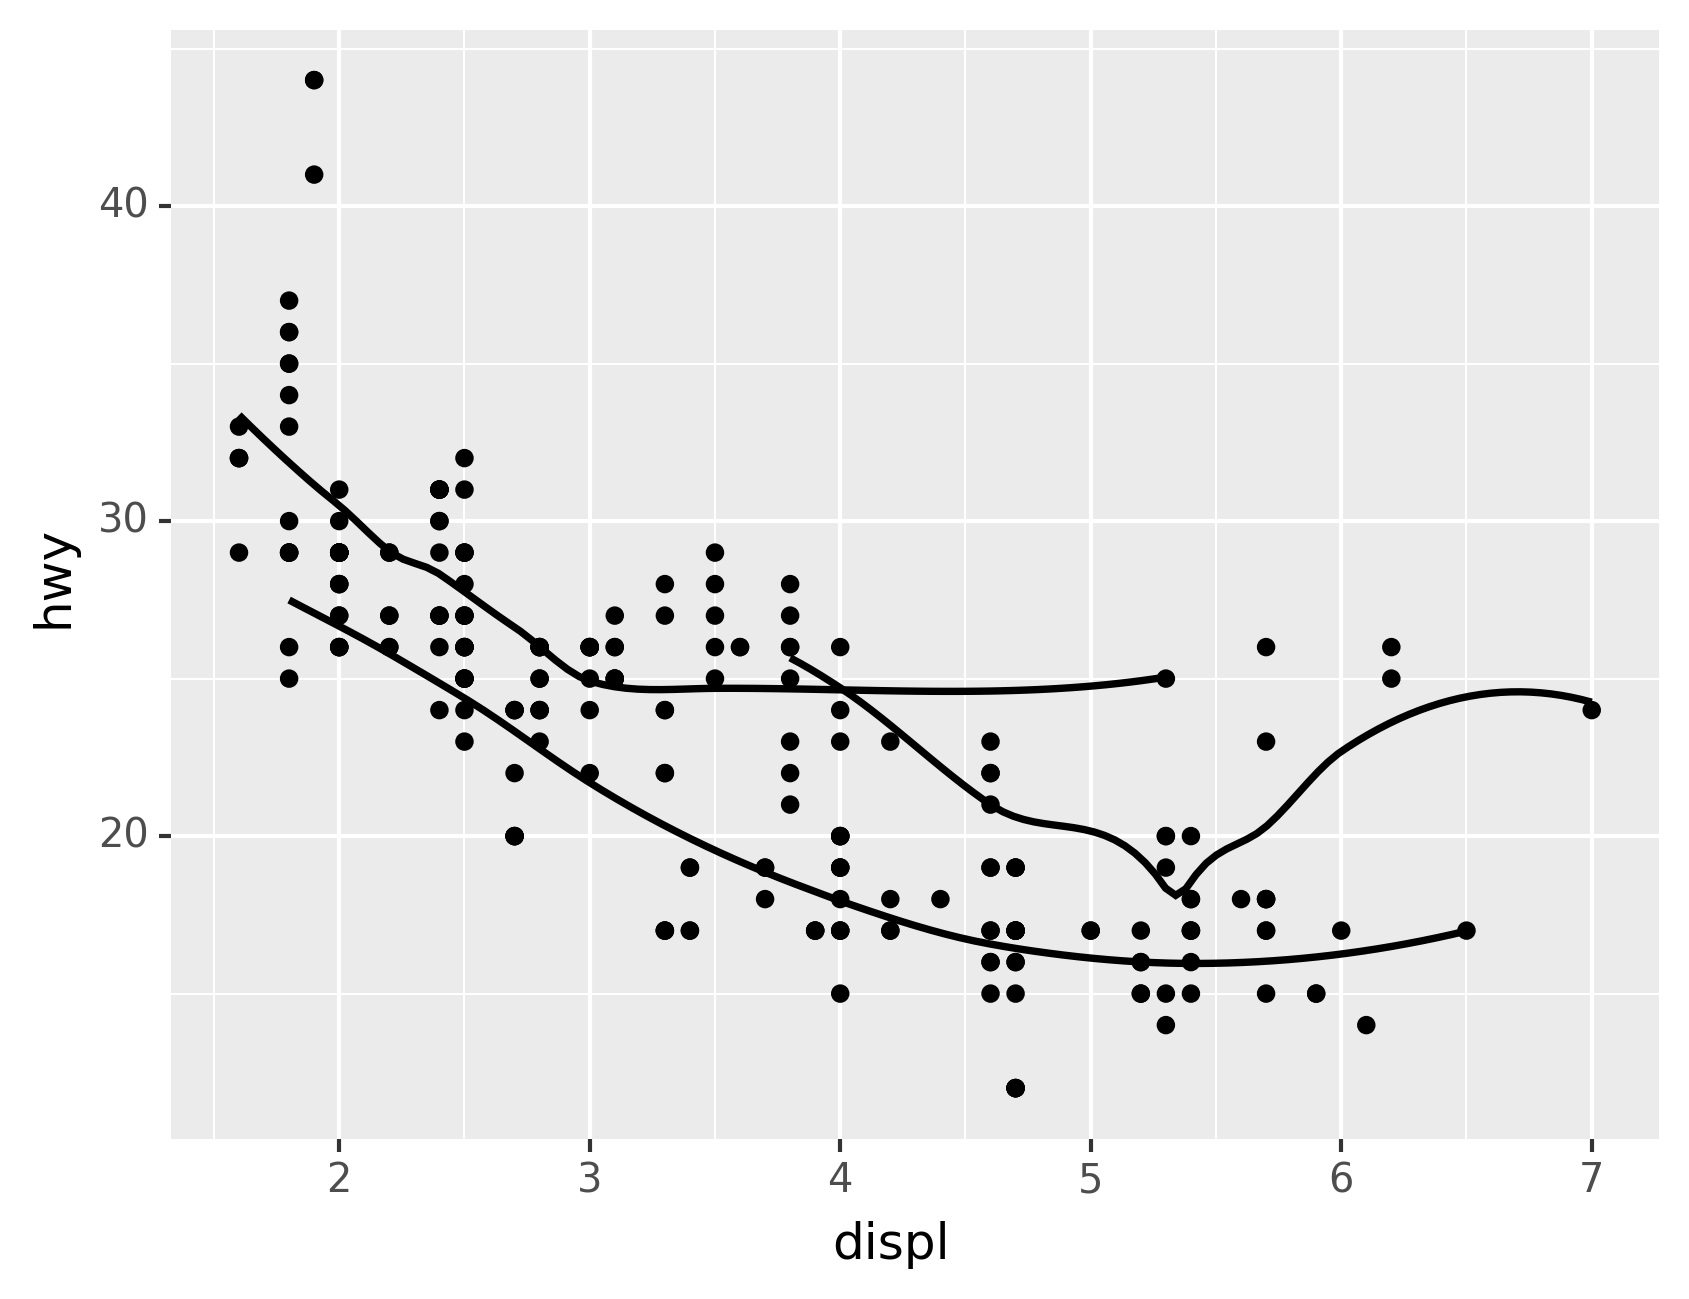

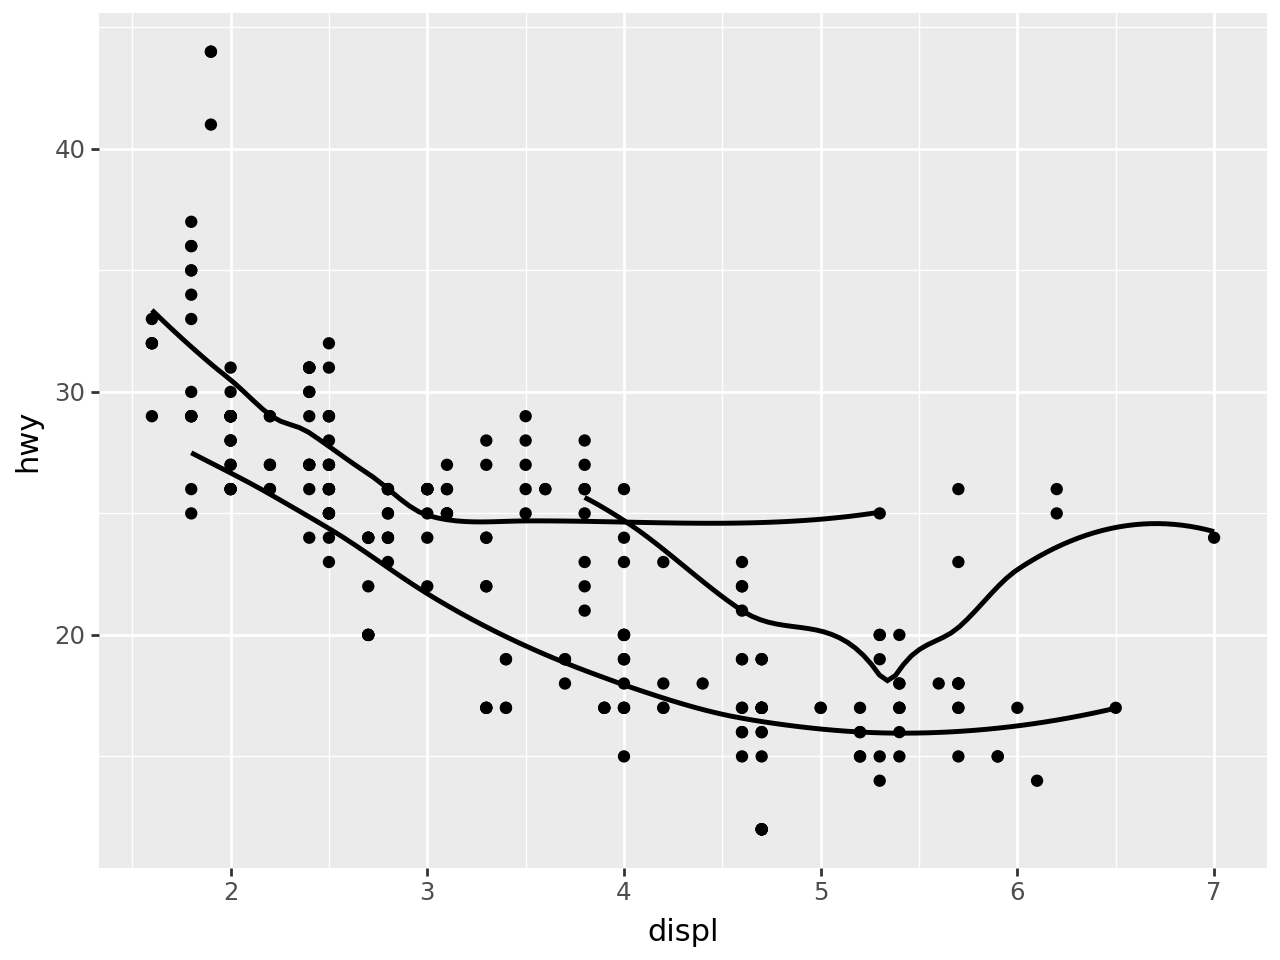

In [ ]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) + \
geom_point() + \
geom_smooth(mapping=aes(group="drv"), se=False, color="black")

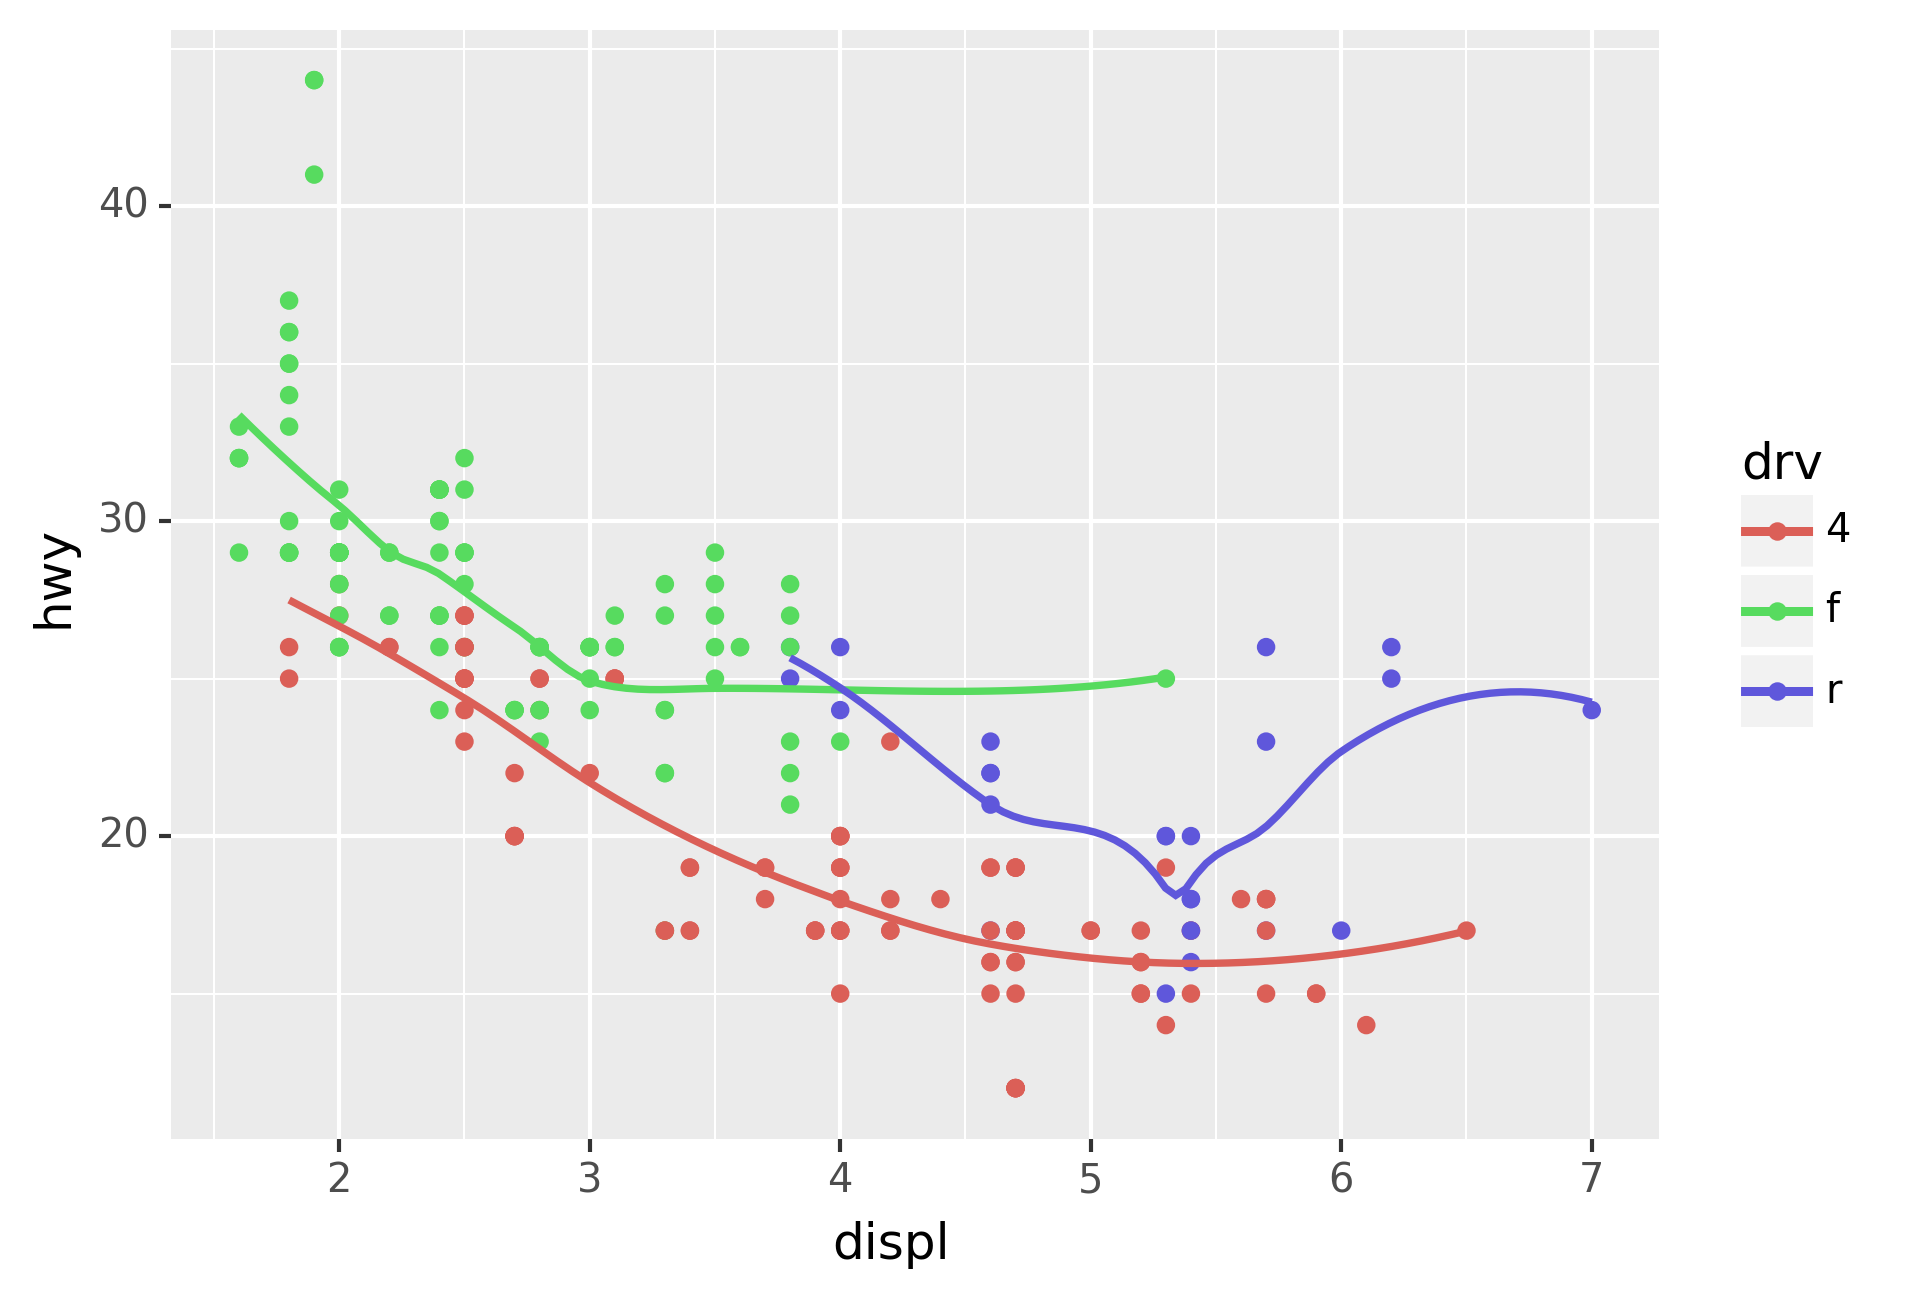

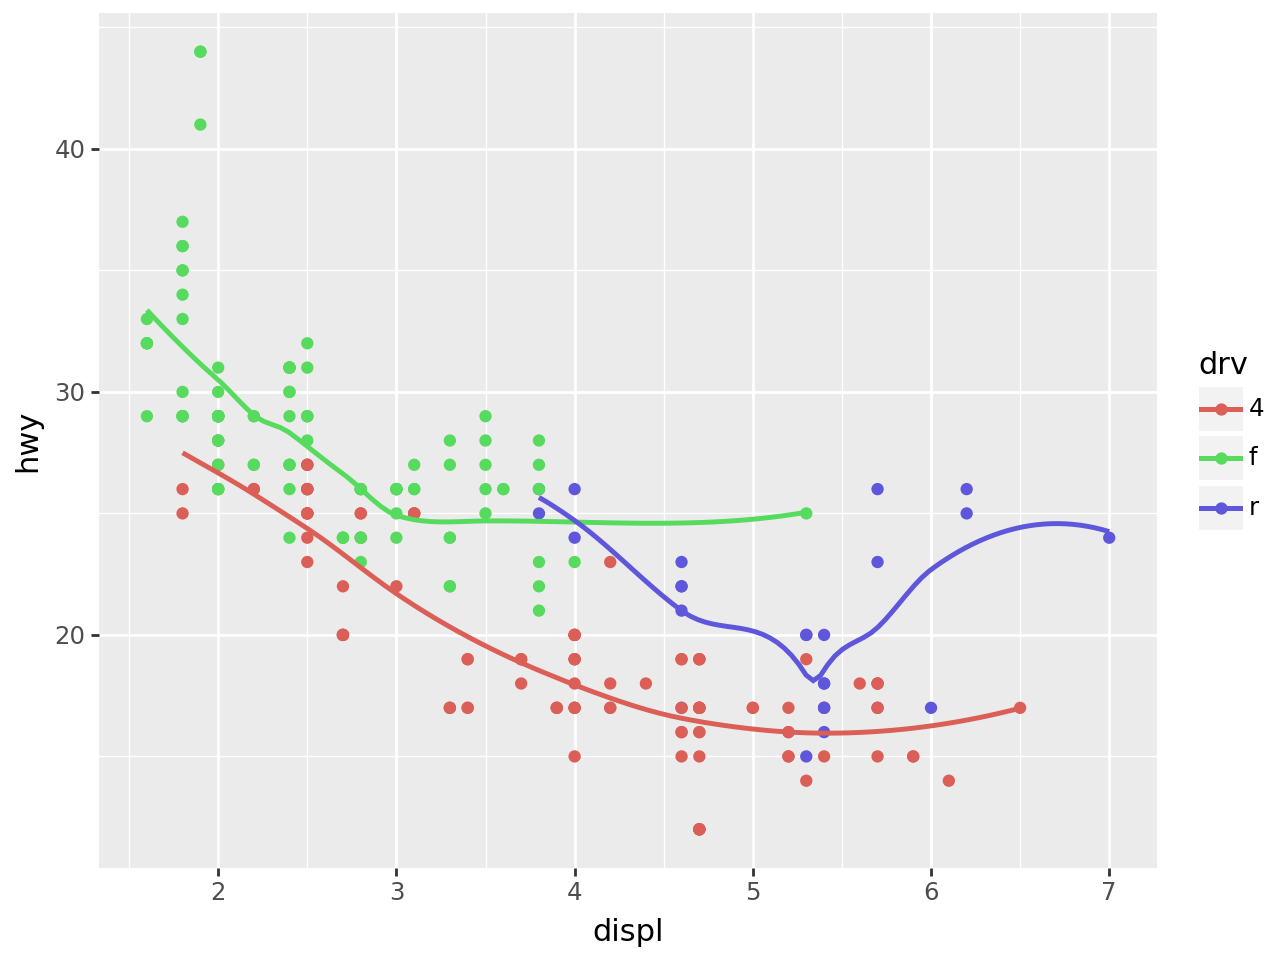

In [ ]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy", color="drv")) + \
geom_point() + \
geom_smooth(se=False)

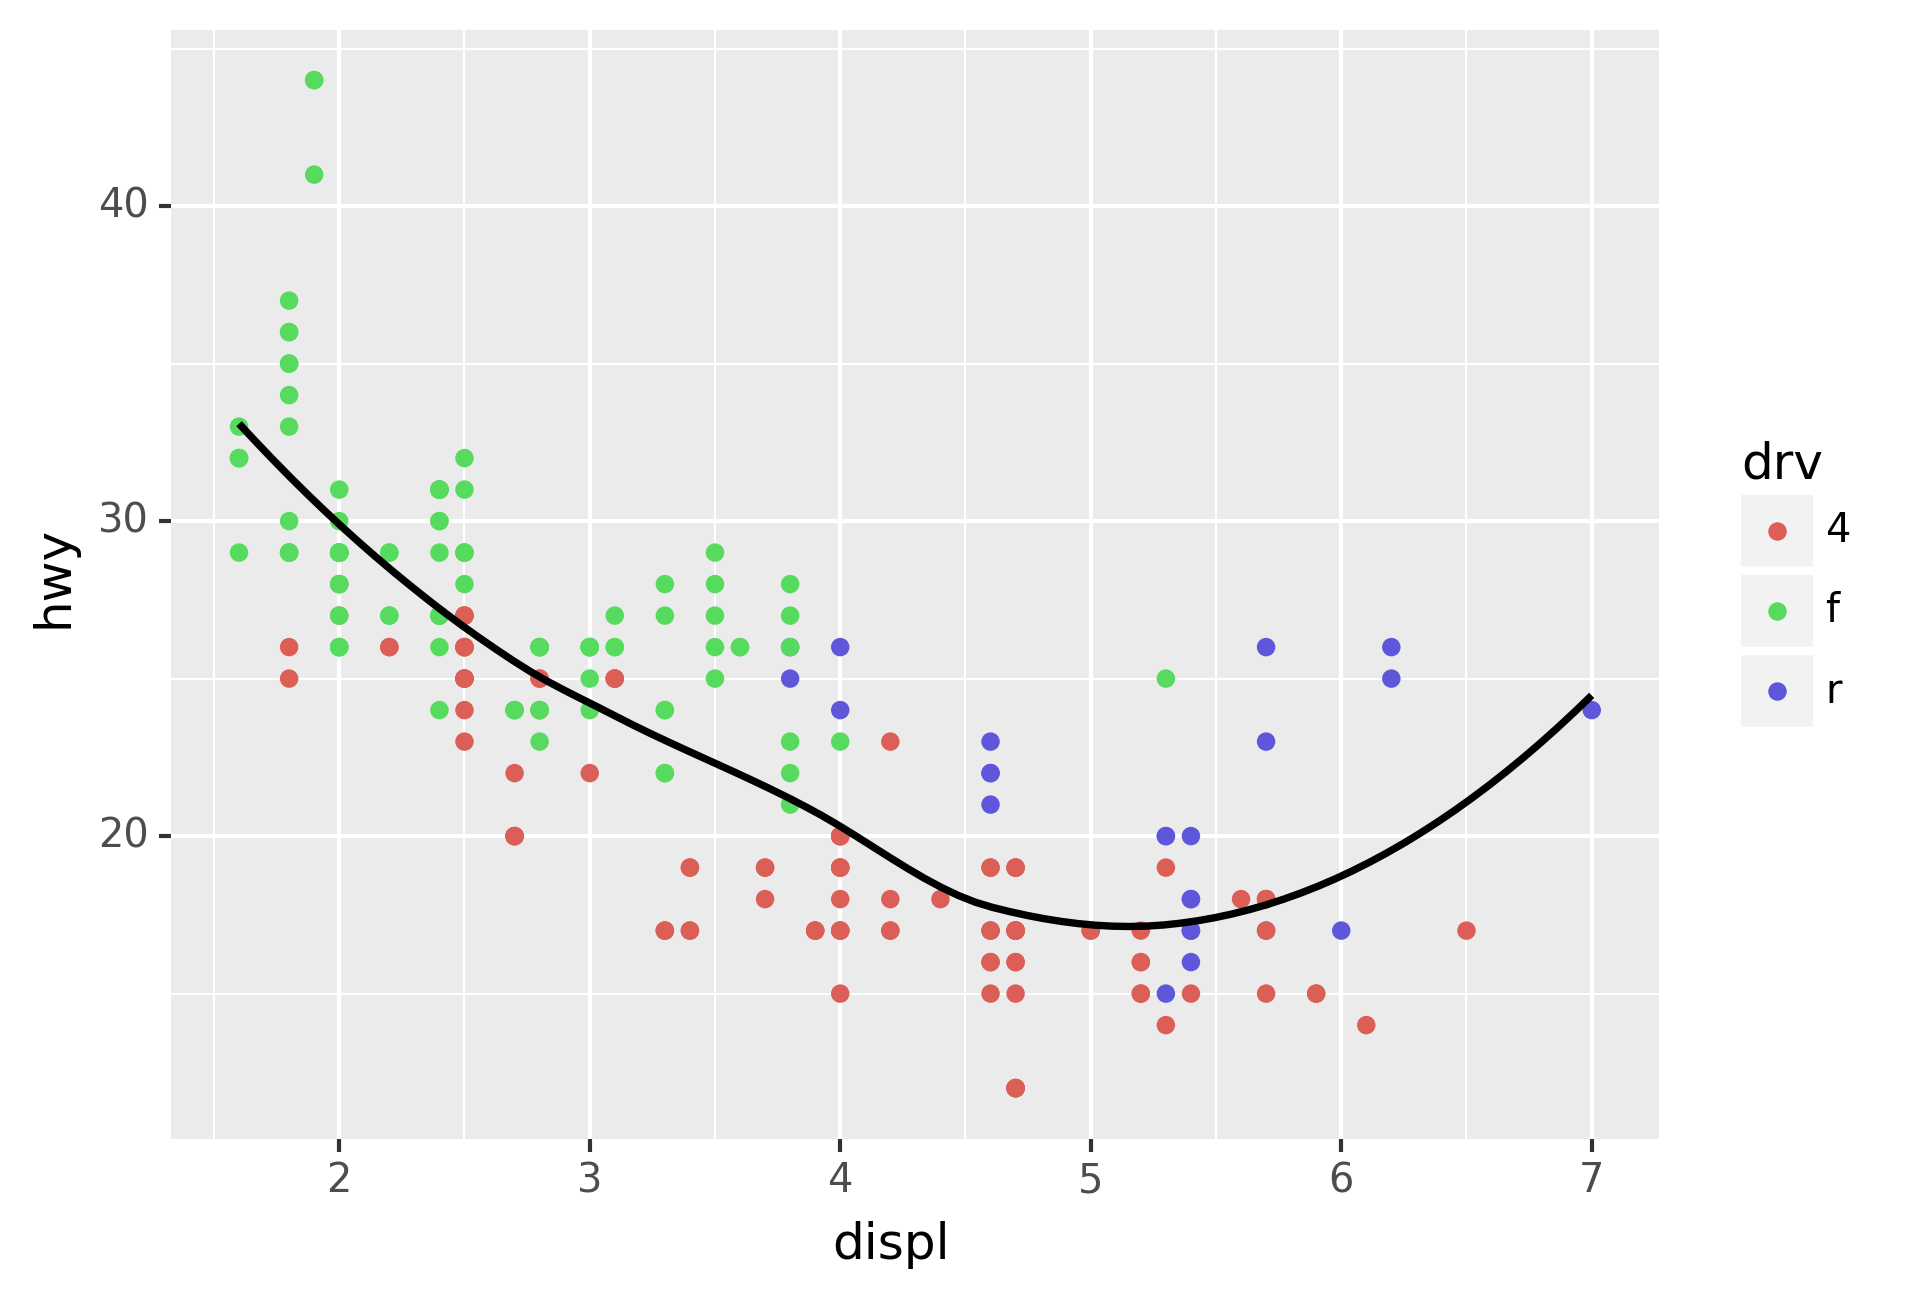

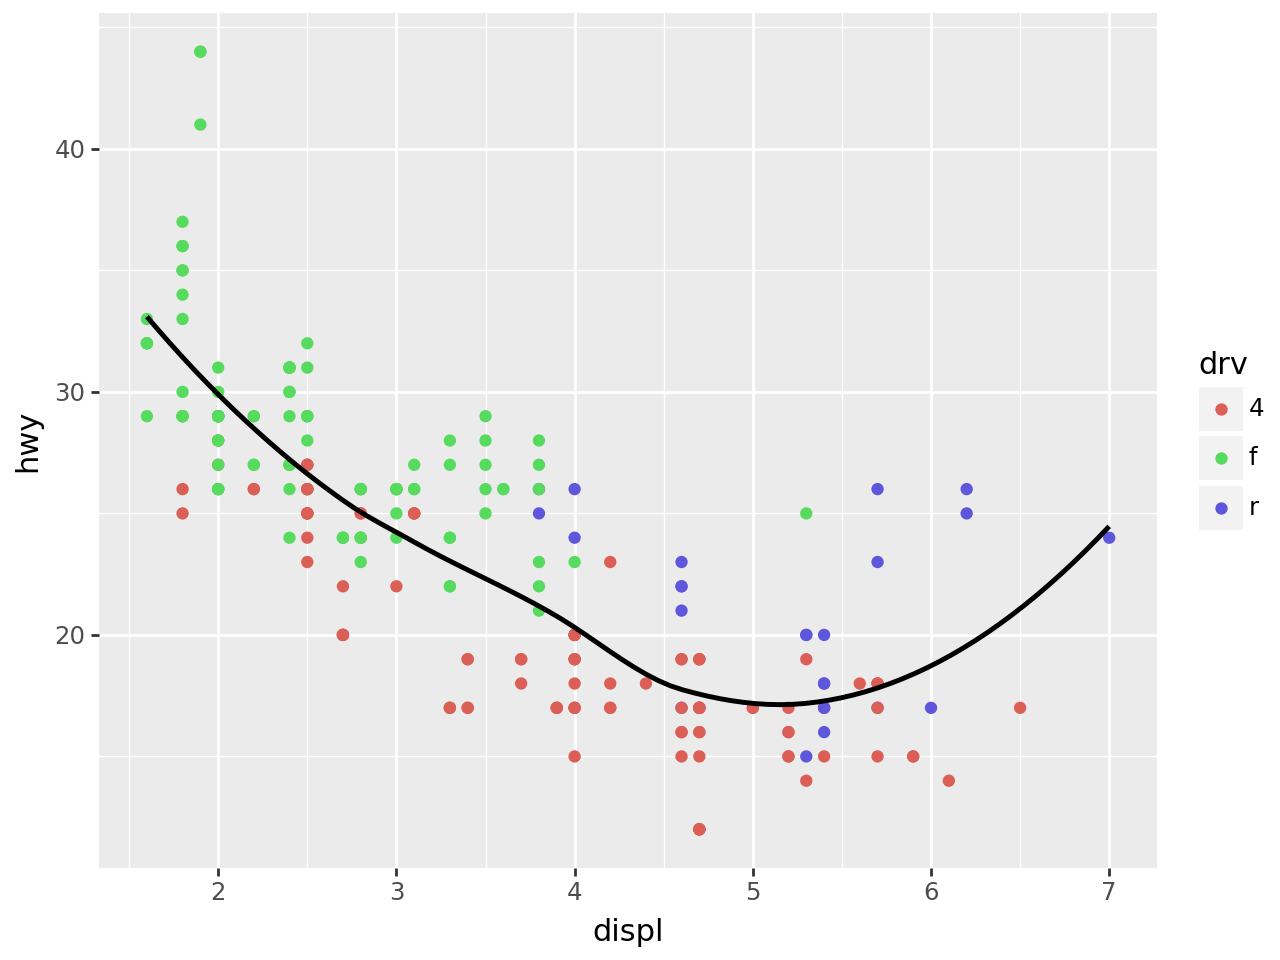

In [ ]:
ggplot(data = mpg, mapping = aes(x ='displ', y ='hwy', color ='drv')) +\
geom_point() +\
geom_smooth(method = "loess", se=False, color = "black")

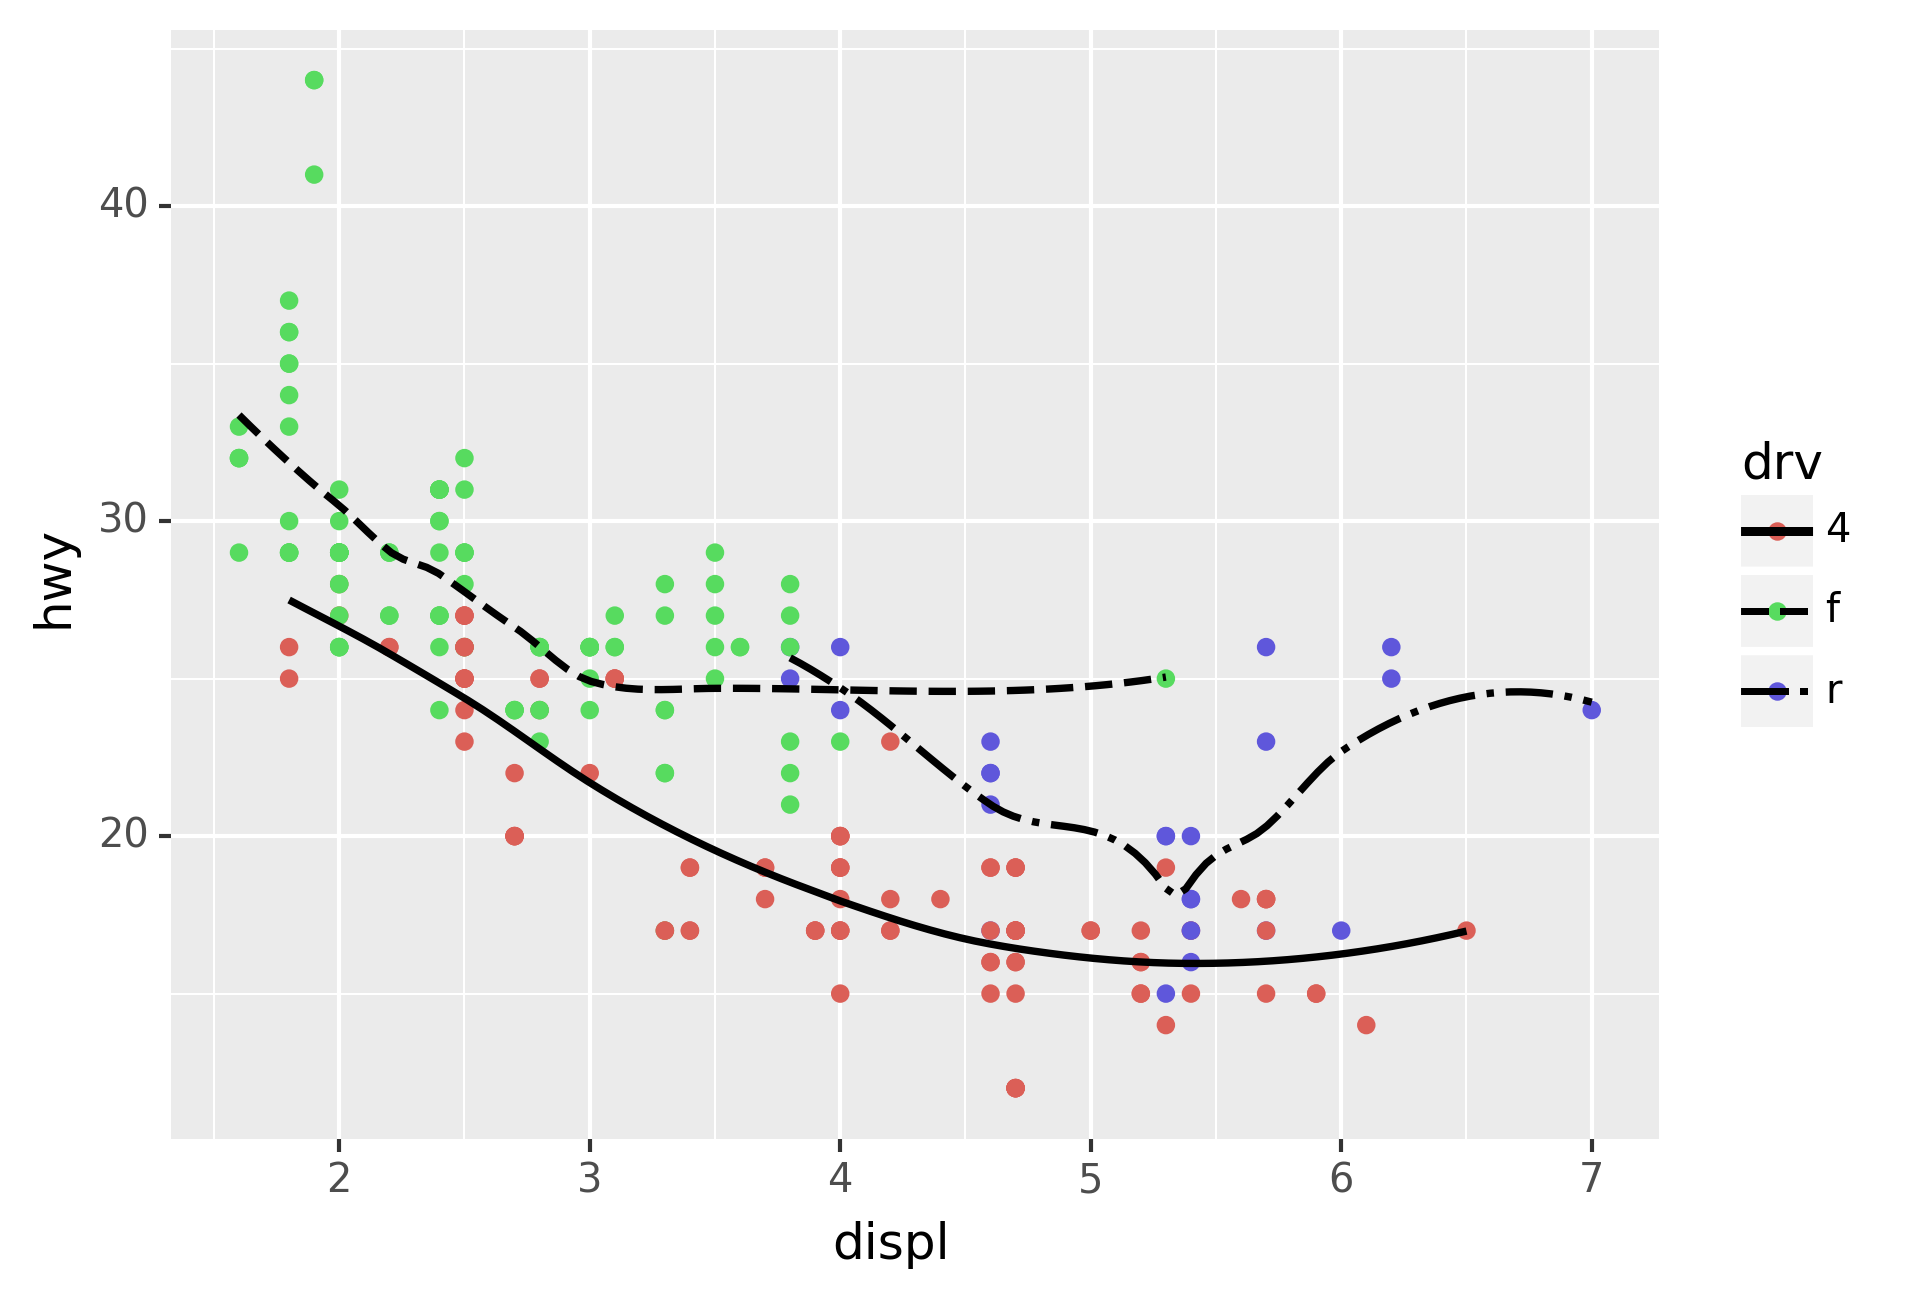

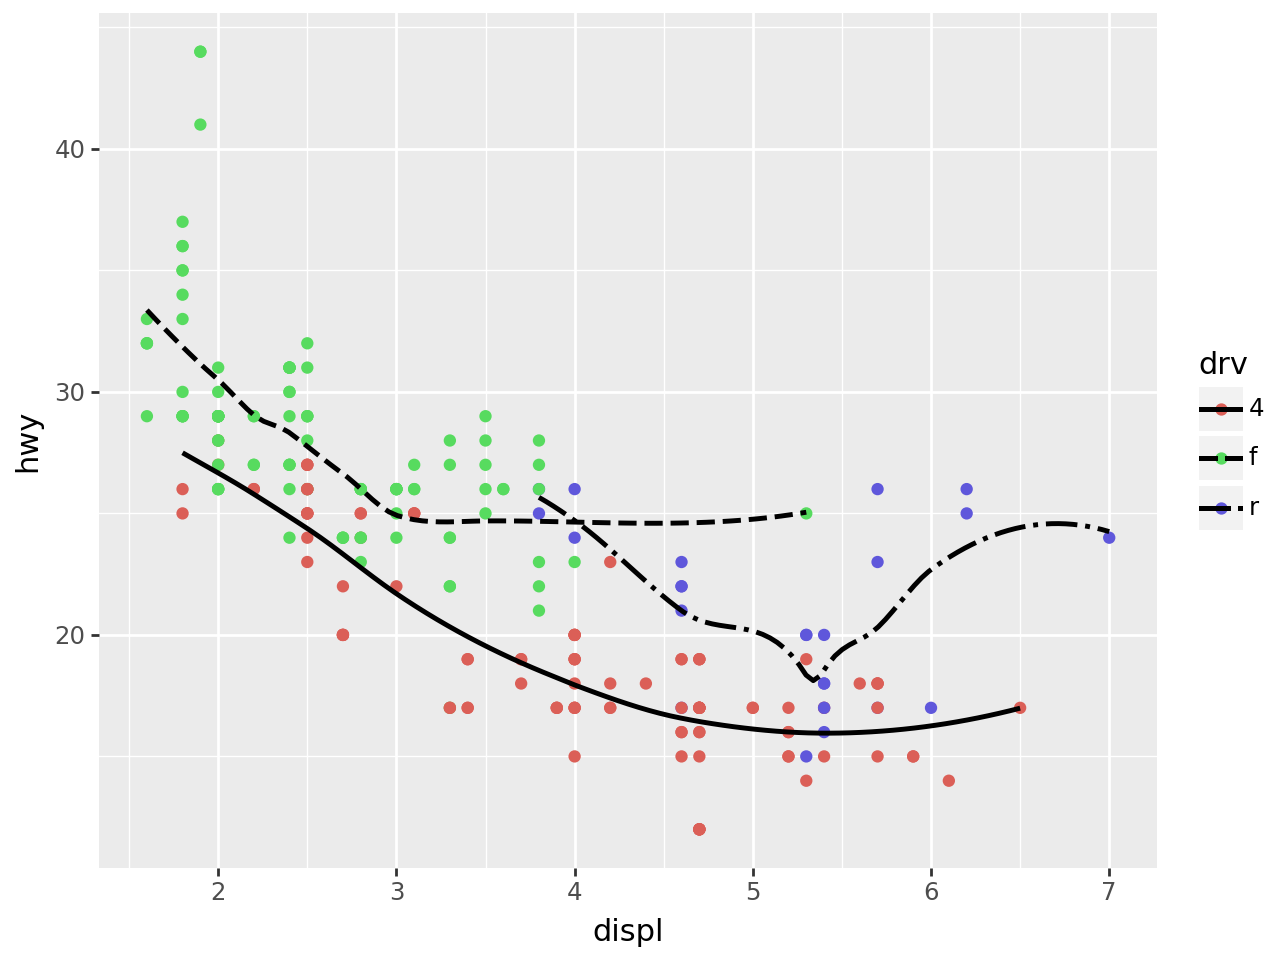

In [ ]:
ggplot(data = mpg, mapping = aes(x ='displ', y ='hwy', color ='drv')) +\
geom_point() +\
geom_smooth(aes(linetype = 'drv'), method = "loess", se=False, color = "black")

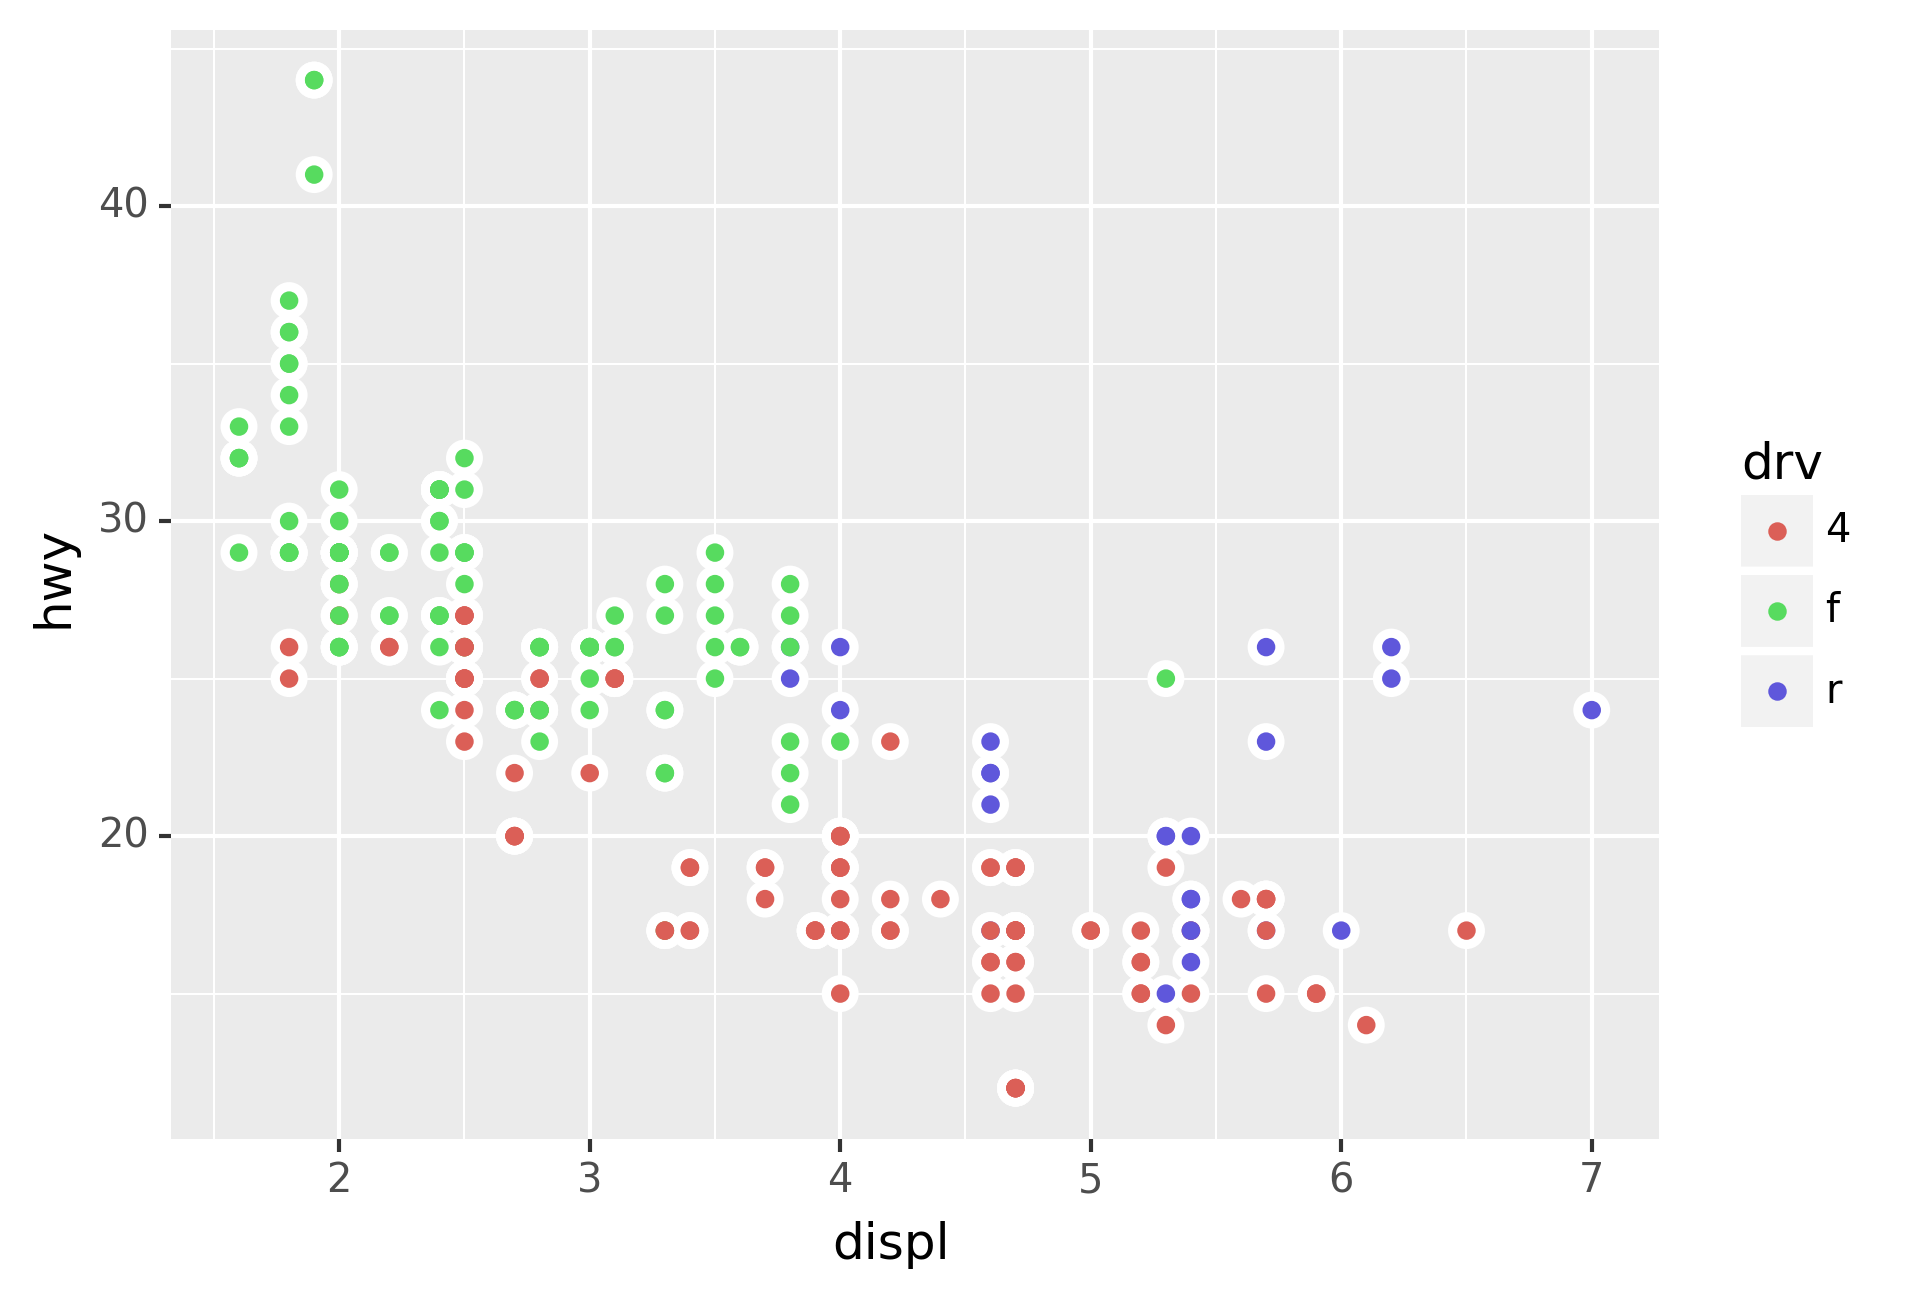

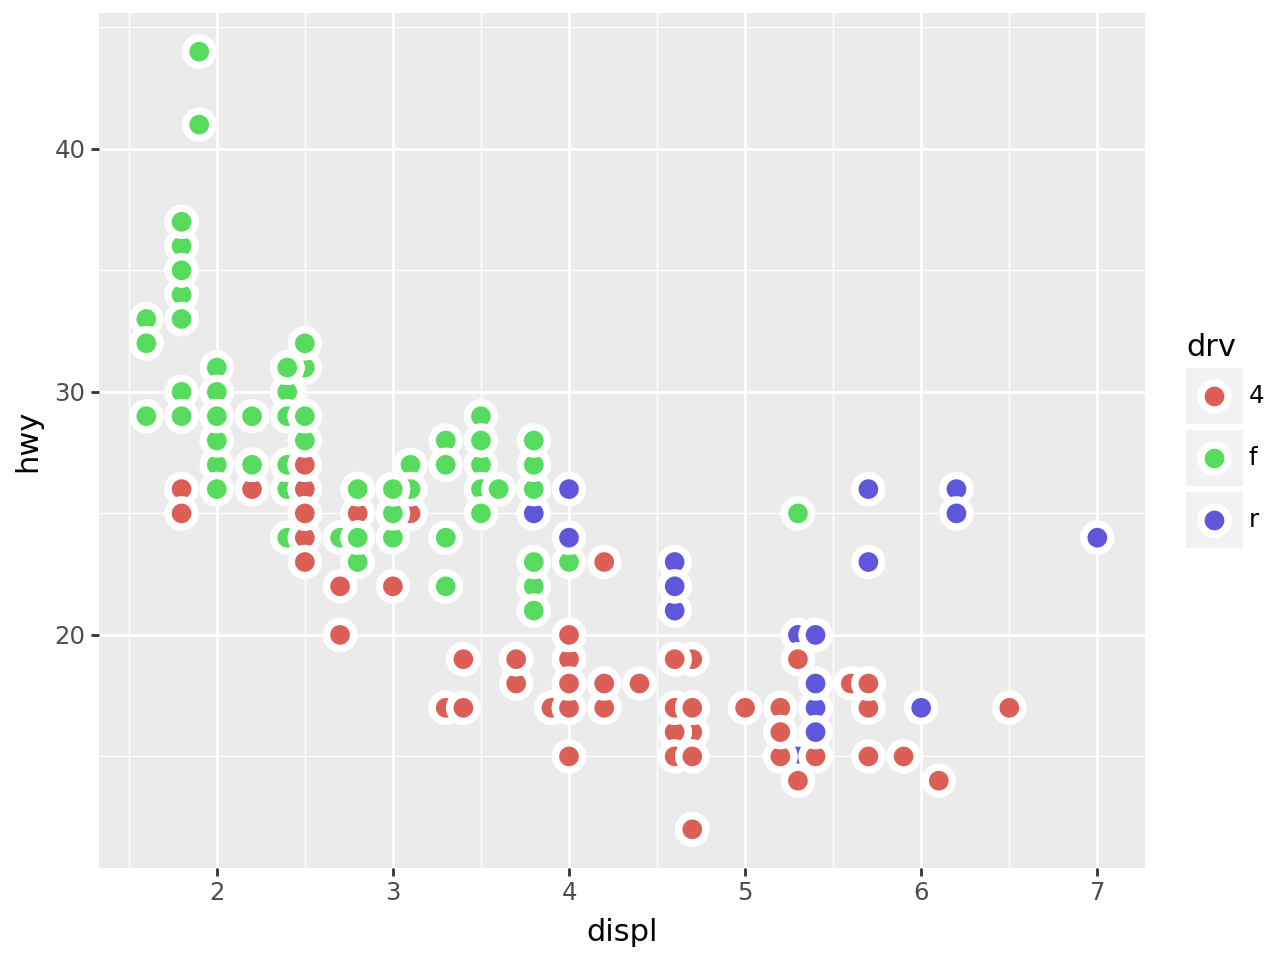

In [ ]:
ggplot(data = mpg, mapping = aes(x = 'displ', y = 'hwy', fill = 'drv')) +\
geom_point(size = 4, shape = 'o', color = "white", stroke = 1.5)

## Статистические свойства элементов категорий

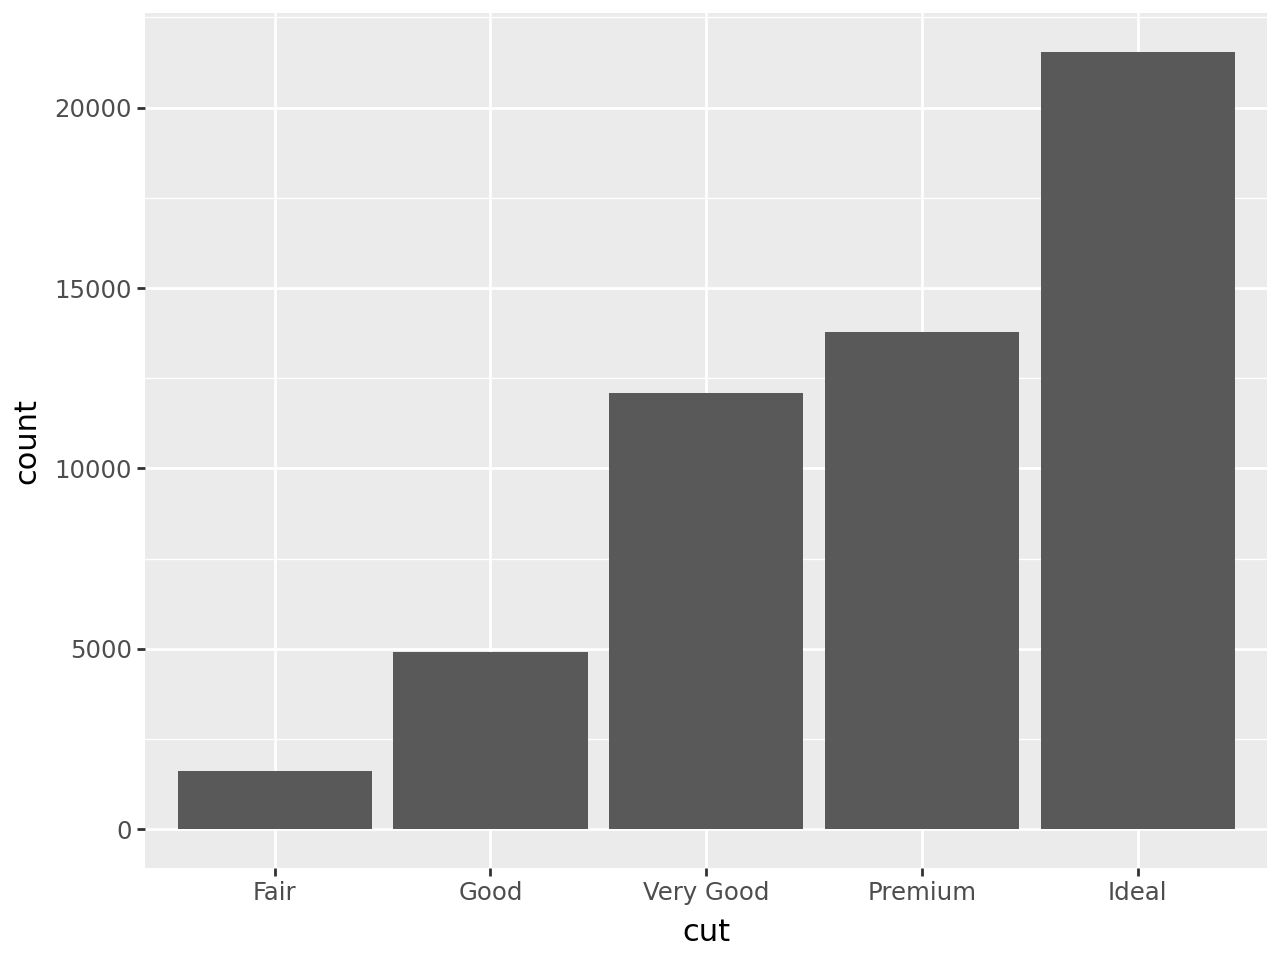

In [ ]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut"))

### Что делает geom_col()? Чем он отличается от geom_bar()?

- geom_bar() автоматически вычисляет частоту данных для оси Y.
- geom_col() использует значения для оси Y из данных, которые передаются.

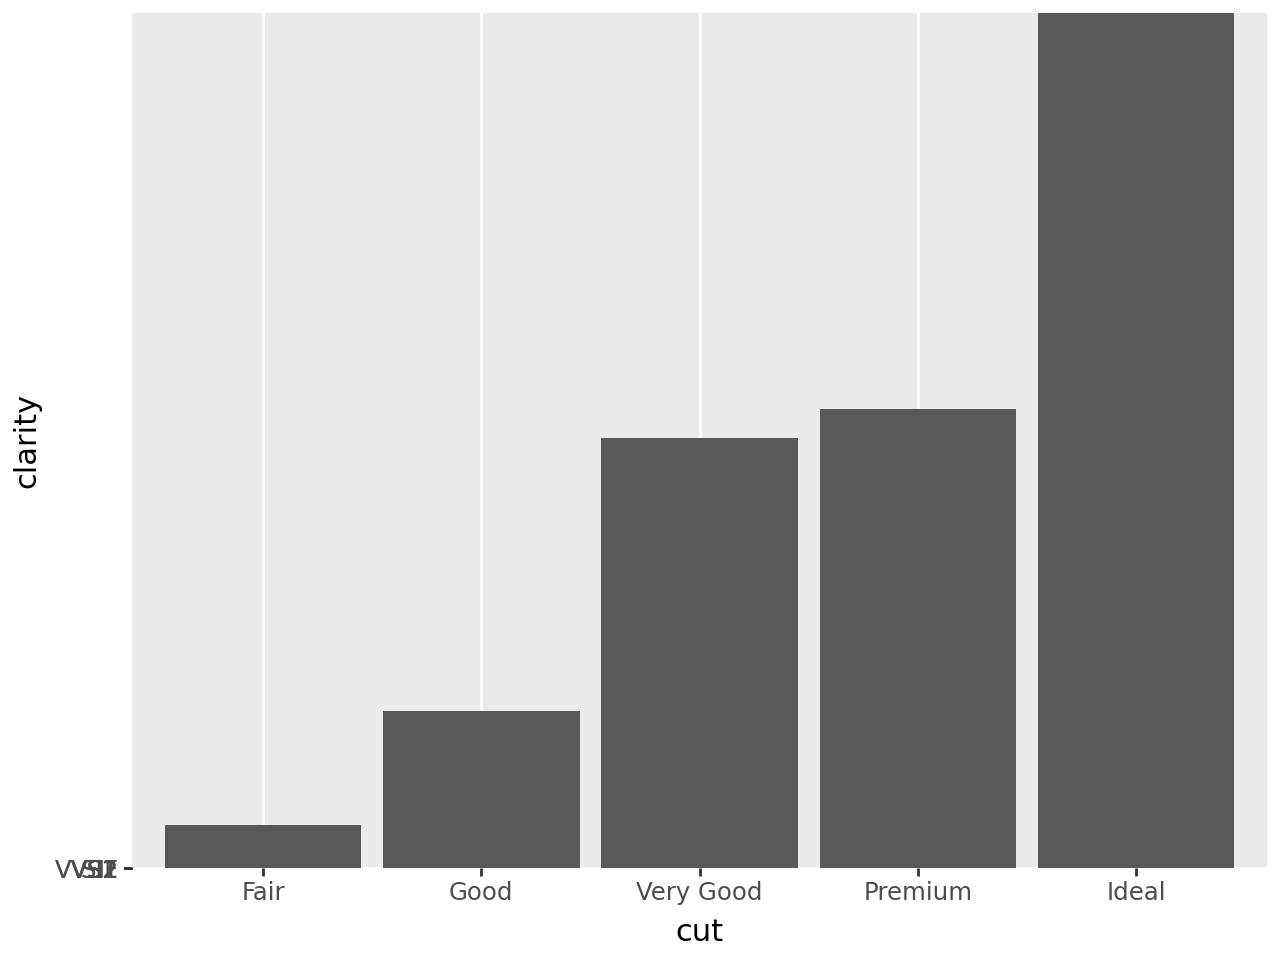

In [131]:
ggplot(data=diamonds) +\
geom_col(mapping=aes(x="cut", y="clarity"))

### Что произойдёт, если
'ggplot(data=diamonds) +\
'geom_bar(mapping=aes(x="cut", y="..prop.."), group=1)
или
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="color", y="..prop.."))
### запустить без "group=1"? Почему?

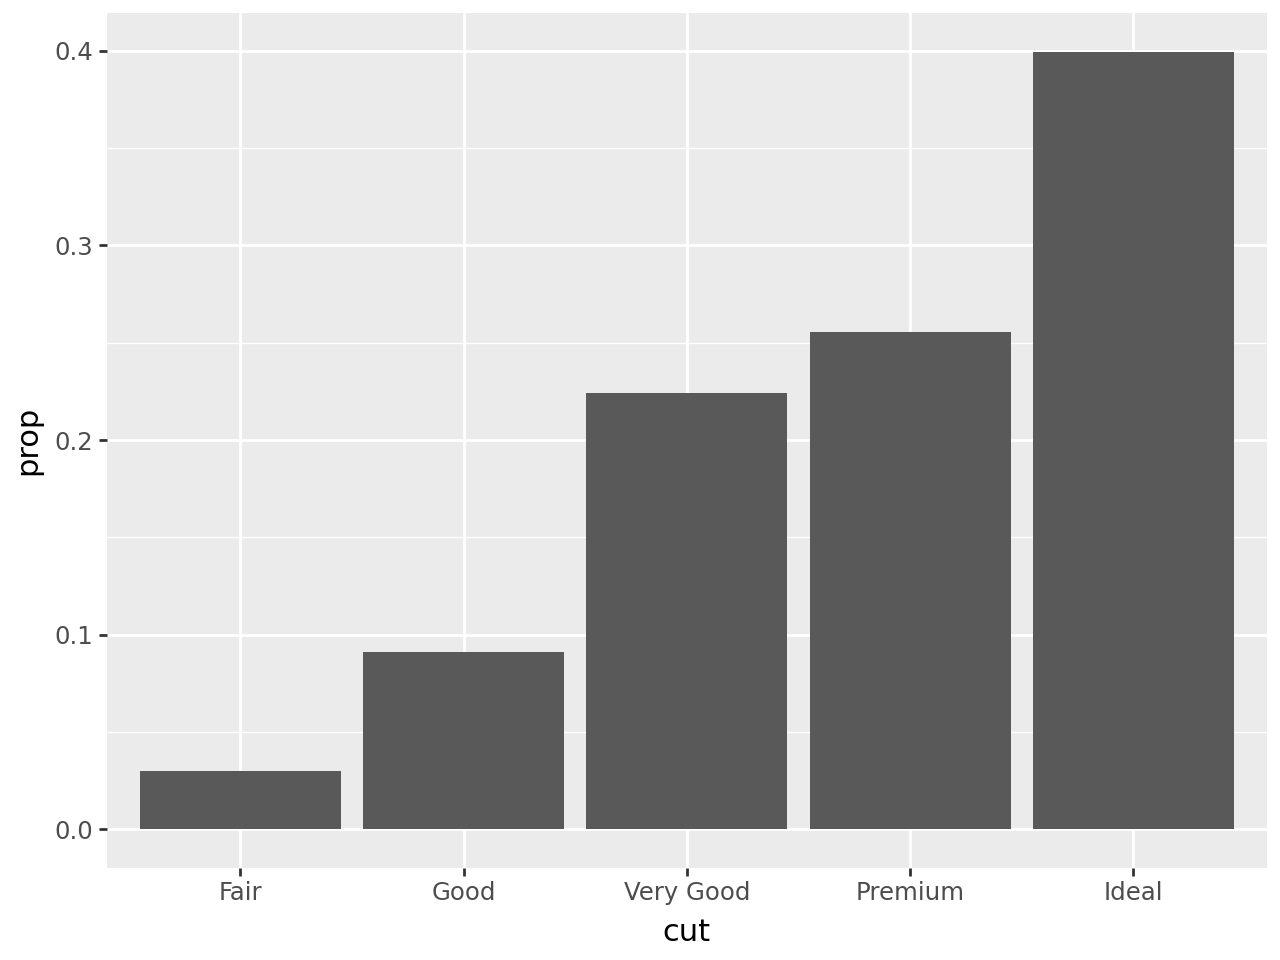

In [143]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", y="..prop.."), group=1)

Если написать group=1 или 2 или x, разницы никакой нет,я на самом деле сначала не очень понял для чего это.

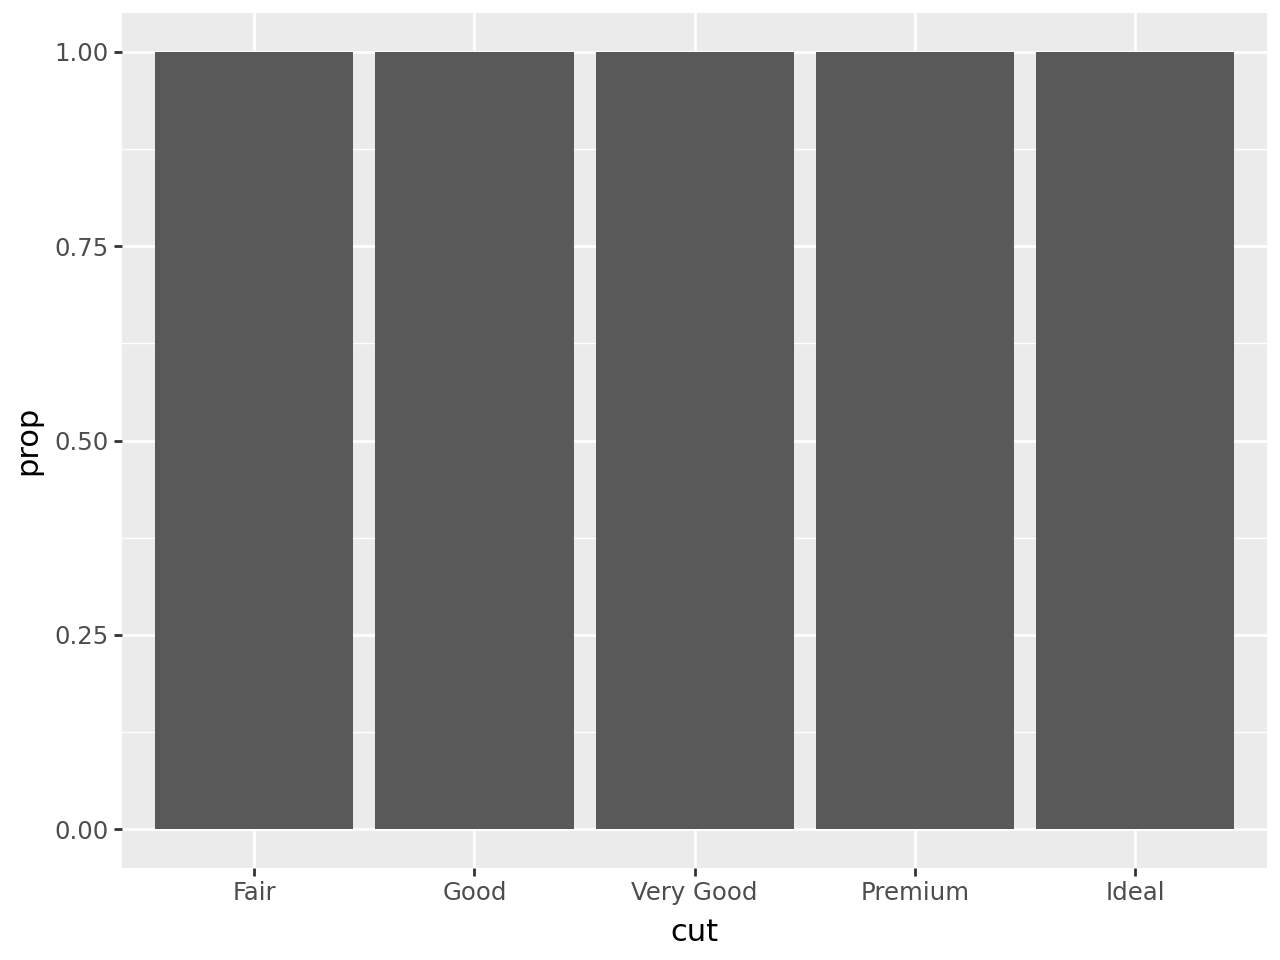

In [135]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", y="..prop.."))

group=«whatever» - это «фиктивная» группировка, отменяющая поведение по умолчанию, которое (здесь) заключается в группировке по срезу, а в общем случае - в группировке по переменной x.

Если нужны пропорции, то необходимо рассматривать все уровни среза вместе. Данные сначала сгруппированы по срезу, поэтому каждый уровень среза рассматривается отдельно. Доля «Справедливого» в «Справедливом» равна 100 %, как и доля «Хорошего» в «Хорошем» и т. д. Группа=1 (или группа=«x» и т. д.) предотвращает это, так что пропорции каждого уровня среза будут относительными для всех уровней среза.

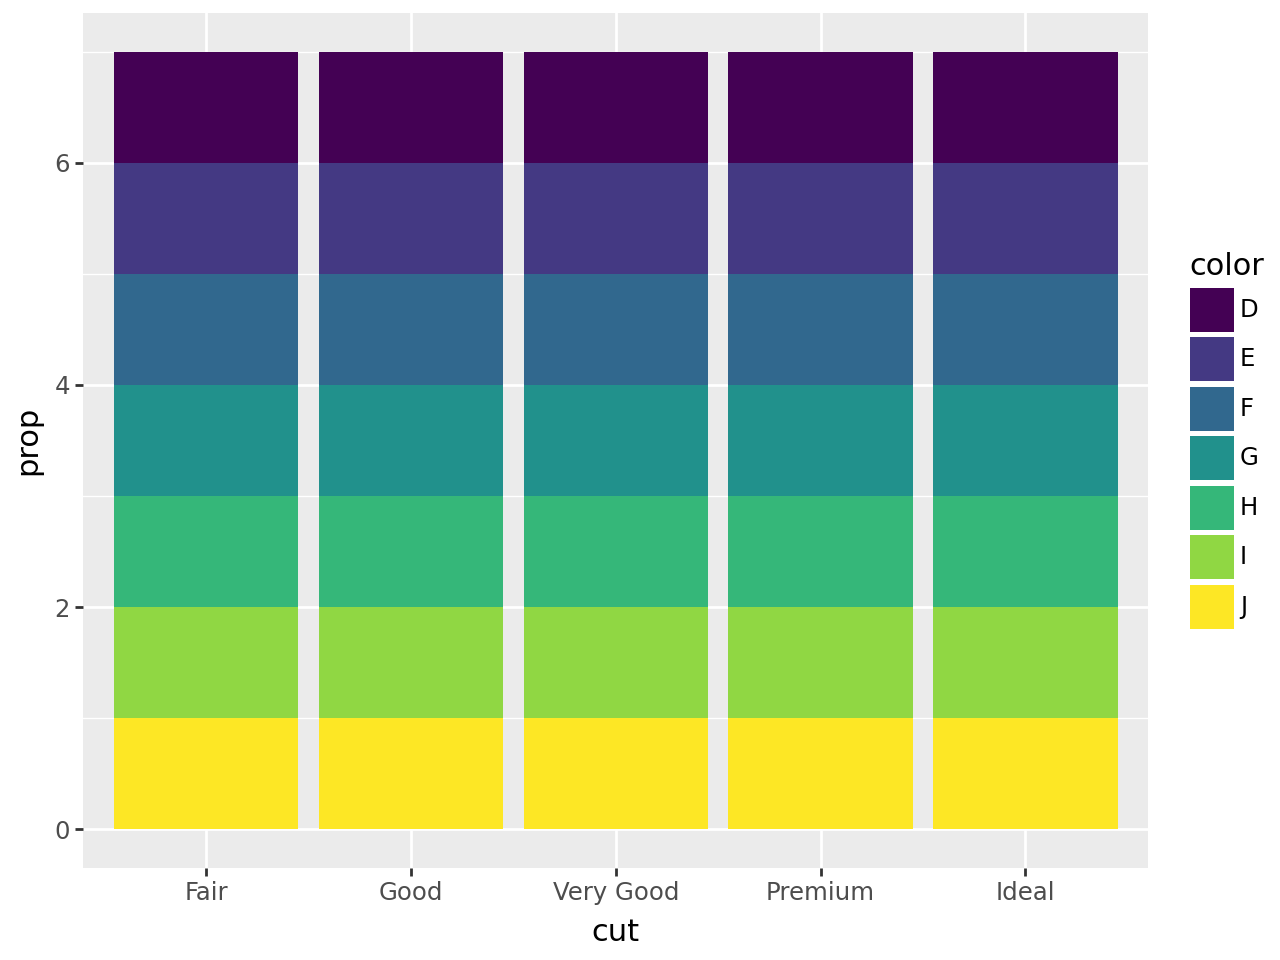

In [136]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill='color', y="..prop.."))

## Модные графики с красивыми цветами

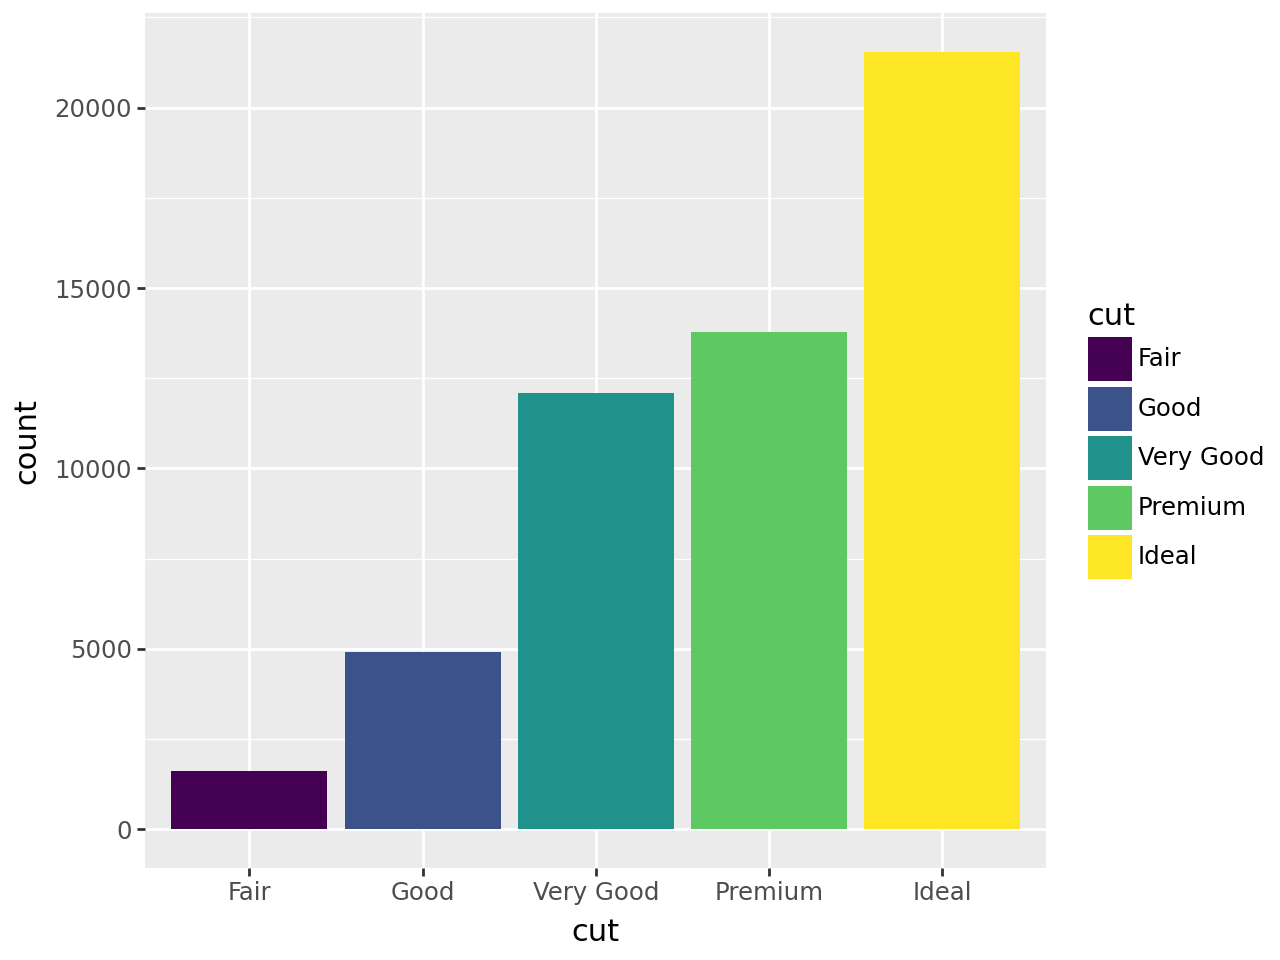

In [144]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="cut"))

## При добавлении новых категорий в качестве цвета появляется новая функциональность

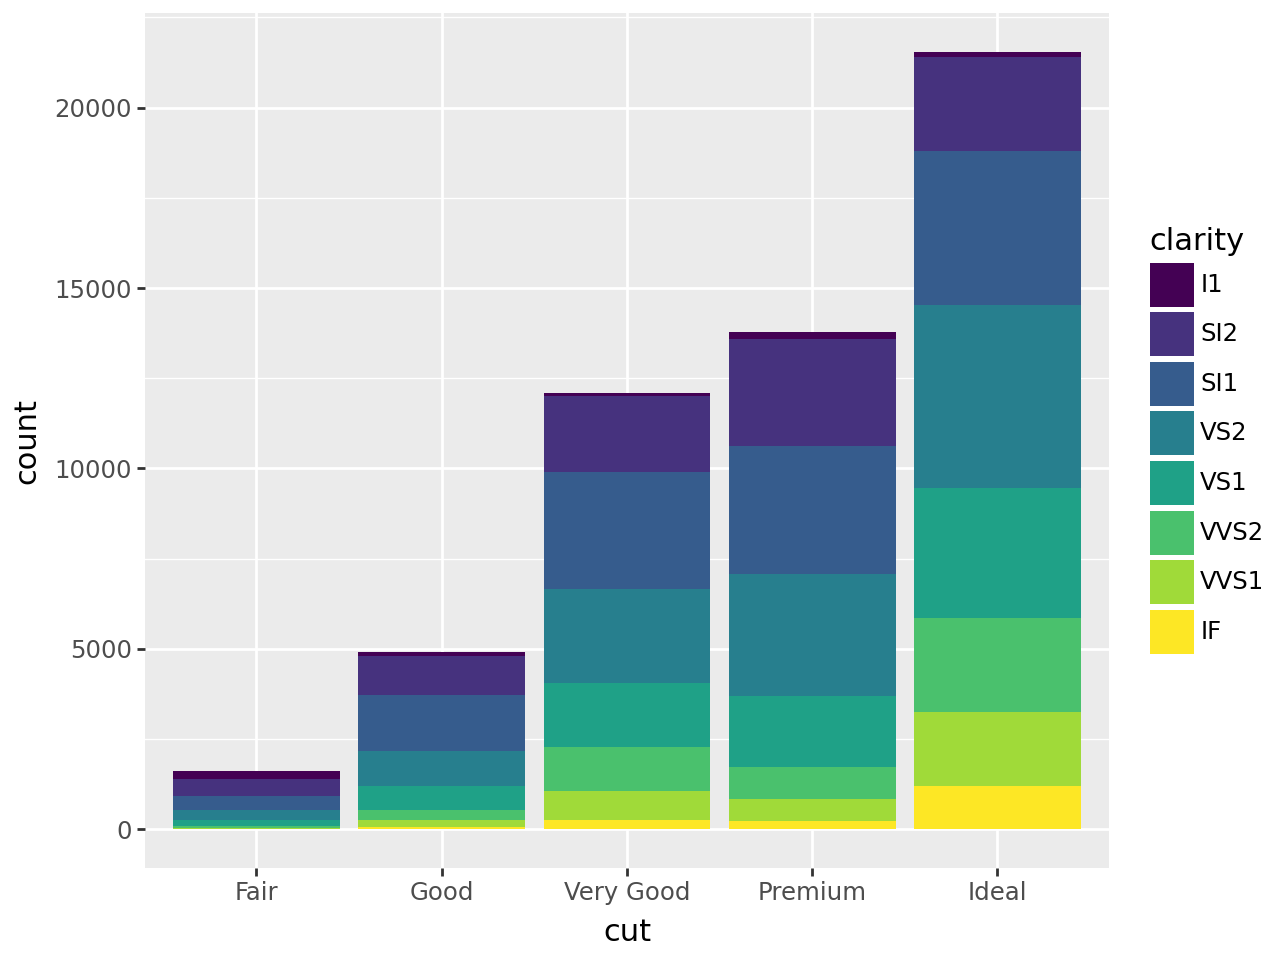

In [145]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"))

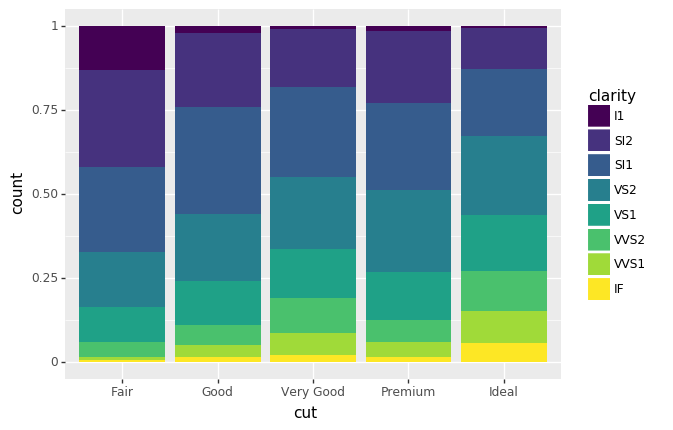

<ggplot: (-9223371871807389036)>

In [ ]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"), position="fill")

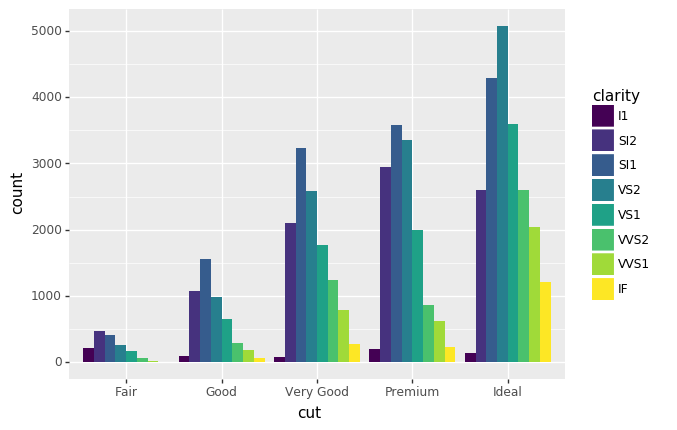

<ggplot: (-9223371871807689112)>

In [ ]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge")

## Добавим jitter в scatter!

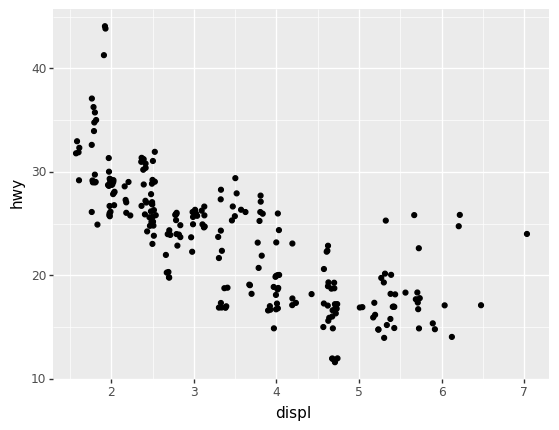

<ggplot: (-9223371871808166468)>

In [ ]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="displ", y="hwy"), position="jitter")


### Зачем тут coord_fixed()? Что делает geom_abline()?

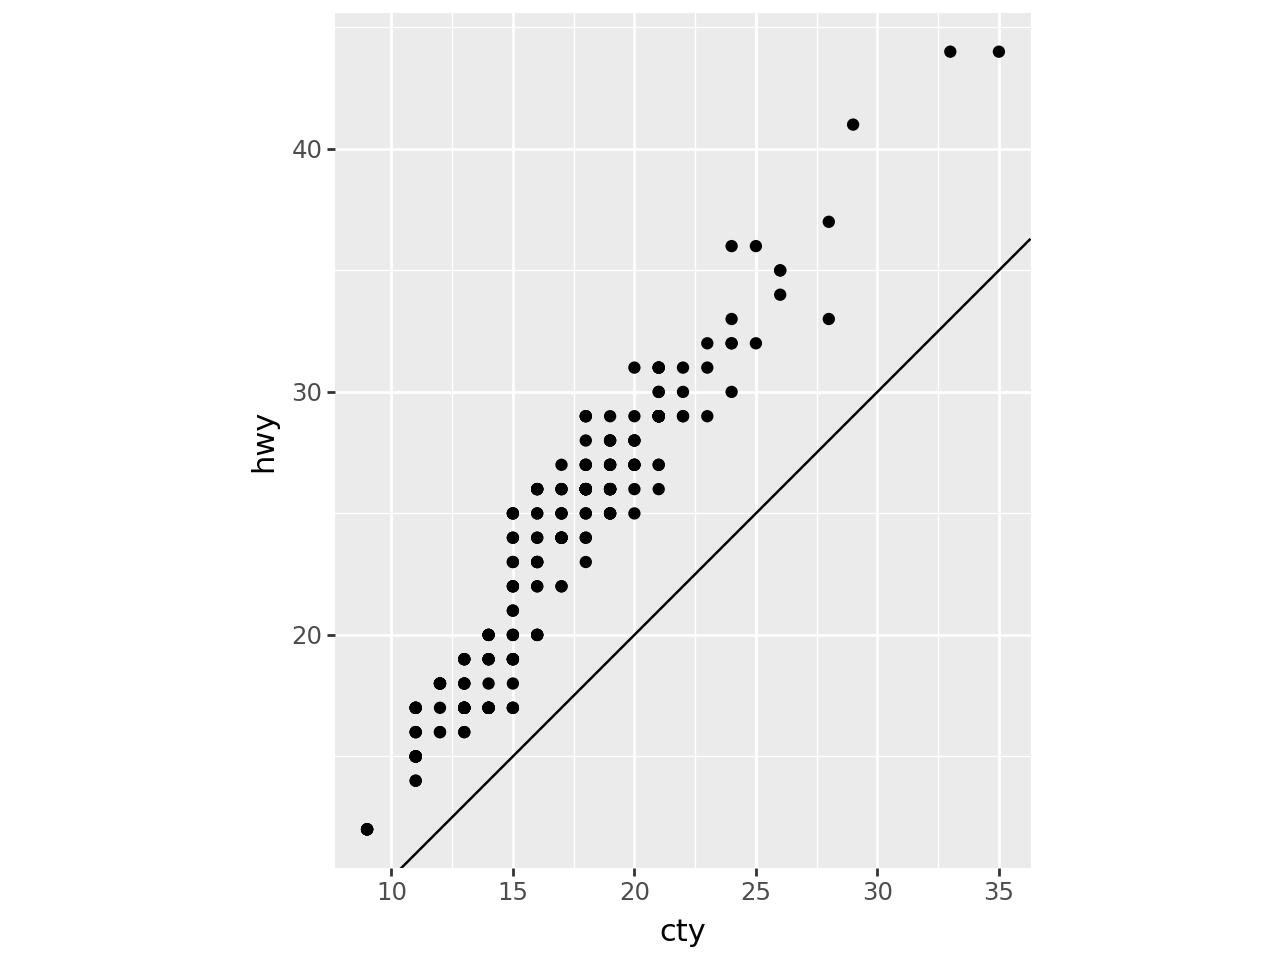

In [156]:
ggplot(data=mpg, mapping=aes(x="cty", y="hwy")) +\
geom_point() +\
geom_abline() +\
coord_fixed()


coord_fixed() — Эта функция фиксирует соотношение сторон графика

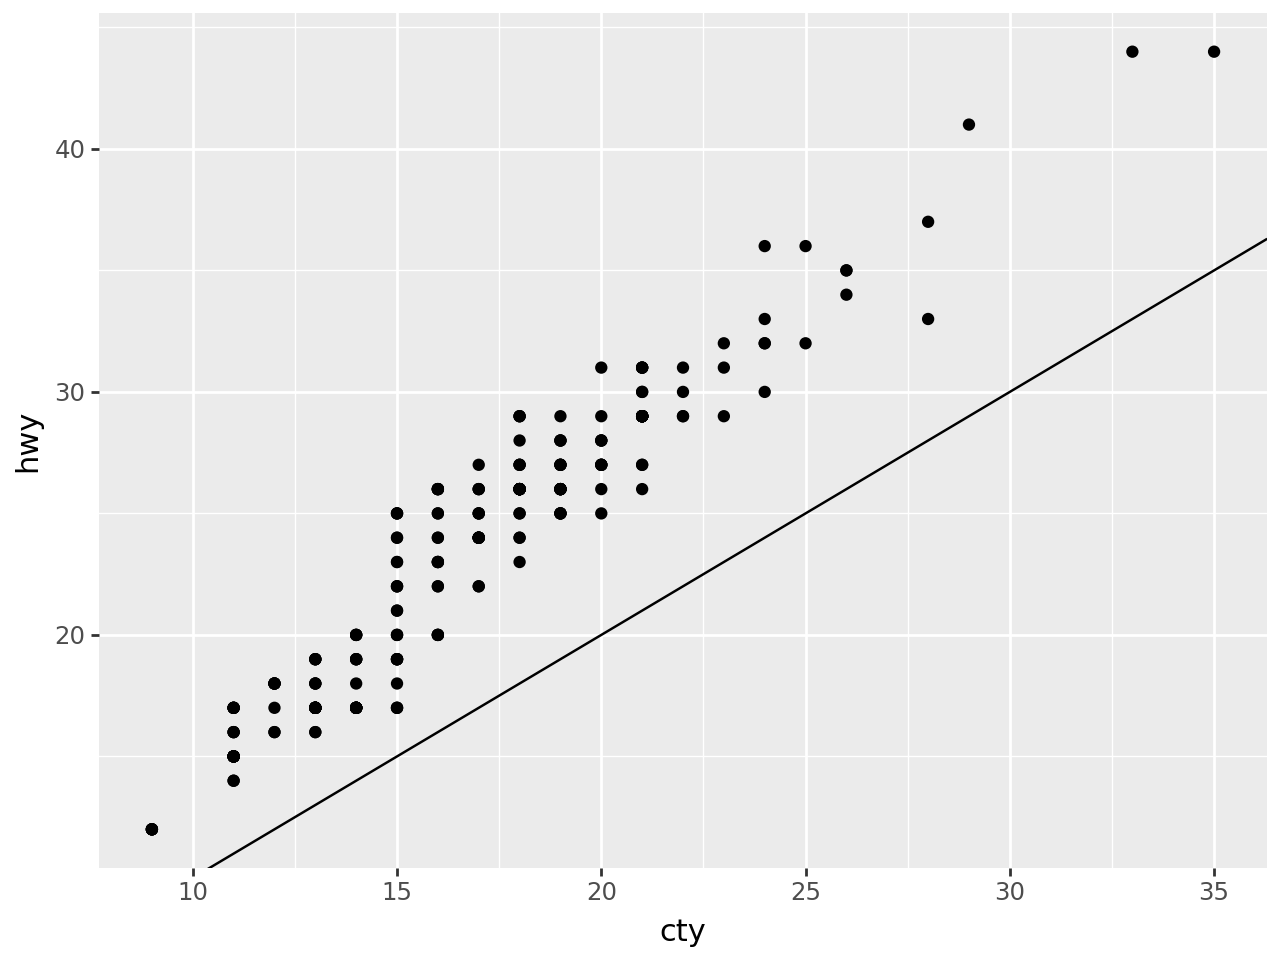

In [157]:
ggplot(data=mpg, mapping=aes(x="cty", y="hwy")) +\
geom_point() +\
geom_abline()

geom_abline() — Этот слой добавляет на график линию, которая имеет уравнение вида
𝑦
=
𝑚
𝑥
+
𝑏
y=mx+b, где
𝑚
m — наклон (slope), а
𝑏
b — смещение (intercept).

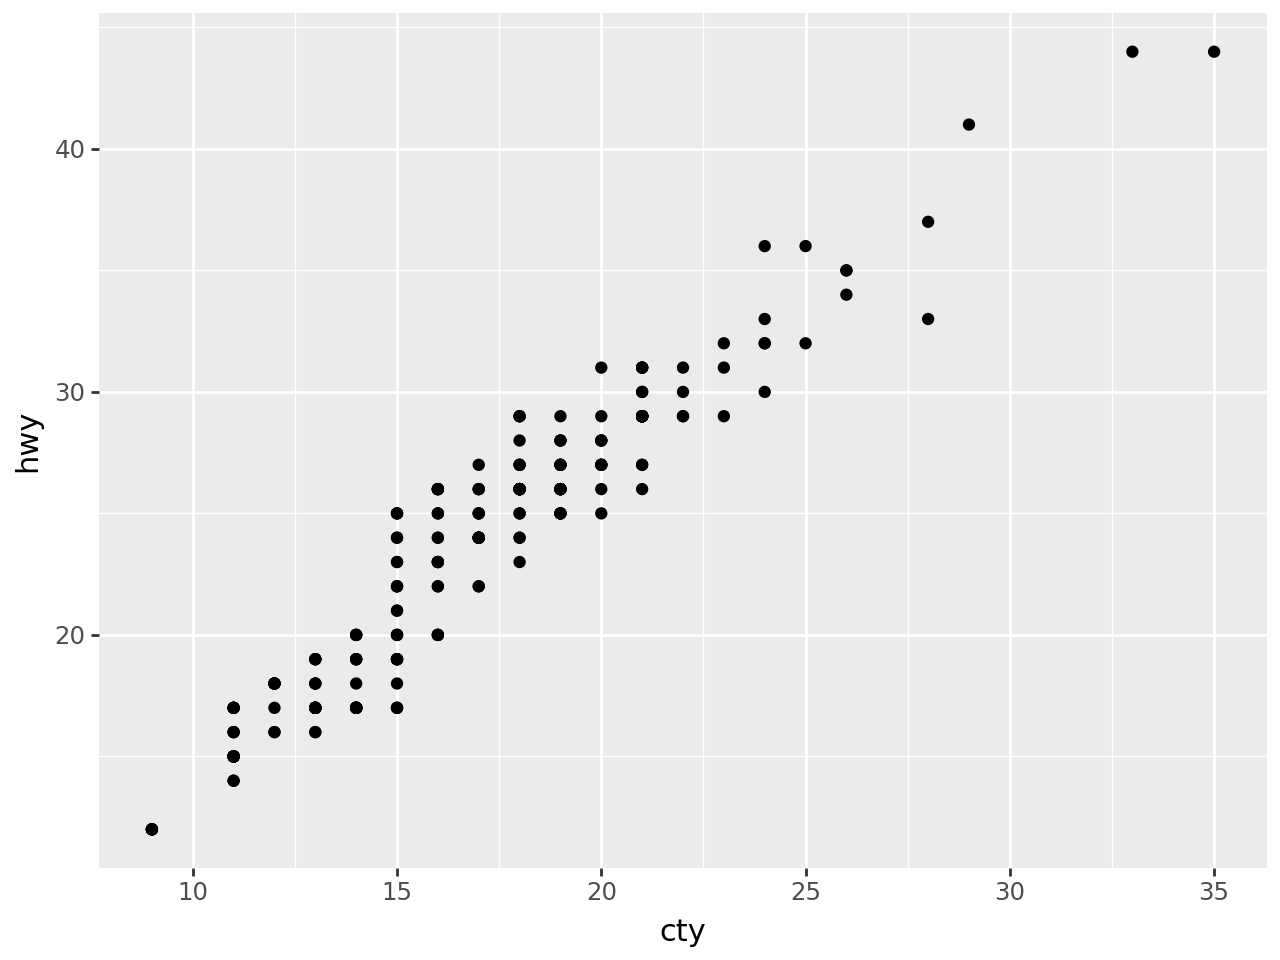

In [158]:
ggplot(data=mpg, mapping=aes(x="cty", y="hwy")) +\
geom_point()

Можно добавить параметры для geom_abline для наклона и смещения линии

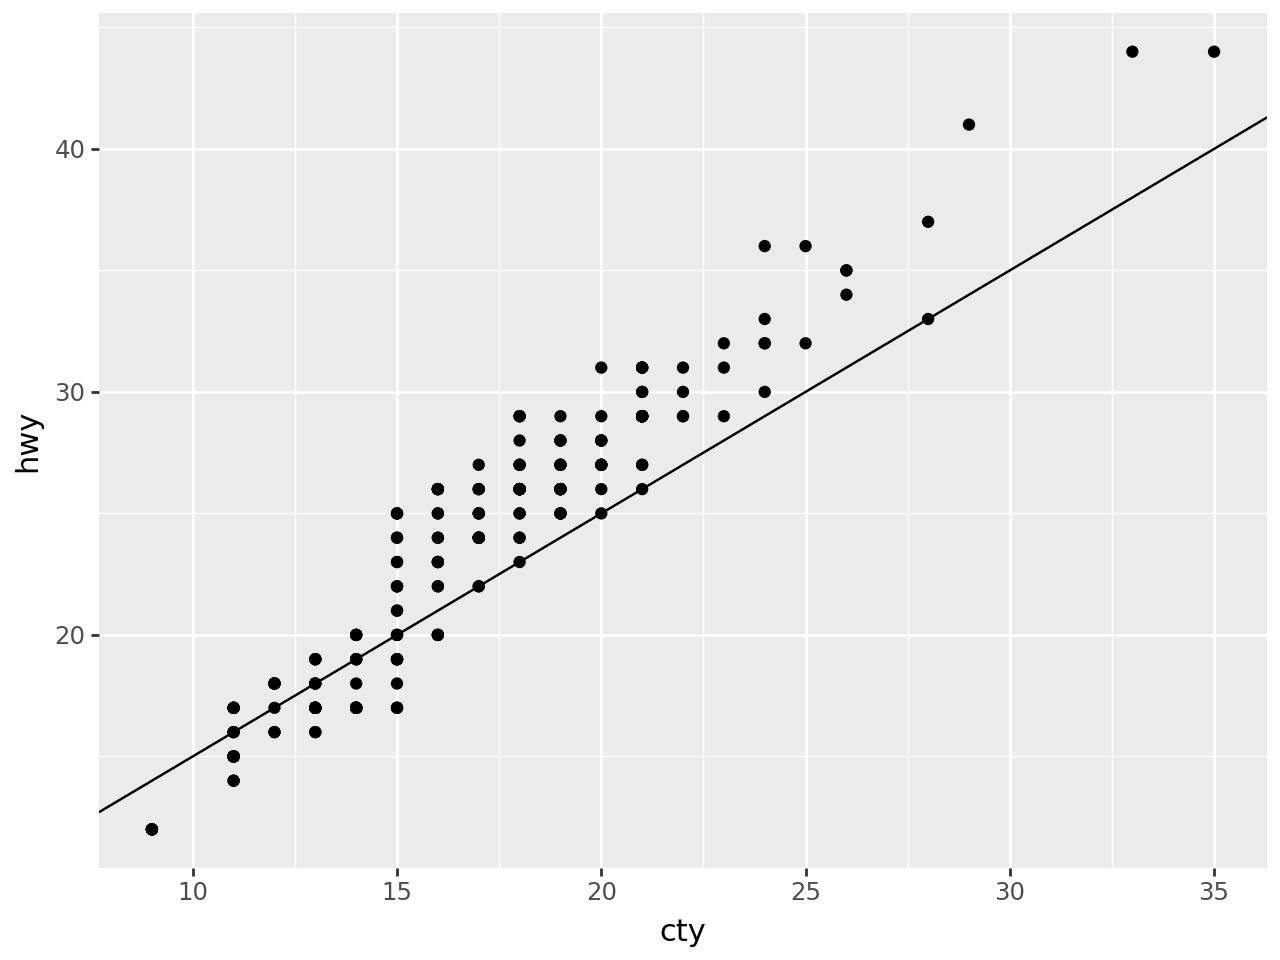

In [159]:
ggplot(data=mpg, mapping=aes(x="cty", y="hwy")) +\
geom_point() +\
geom_abline(slope=1, intercept=5)

# Творческое задание
## Попробуйте использовать изученные средства plotnine для своего датасета (необязательно много и пока не надо строить сложные графики)

Загрузим датасет из моей первой ЛР

In [160]:
import kagglehub

In [161]:
# Download latest version
path = kagglehub.dataset_download("ruiromanini/mtcars")

print("Path to dataset files:", path)

100%|██████████| 999/999 [00:00<00:00, 429kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ruiromanini/mtcars/versions/1


In [162]:
# Чтение данных
df = pd.read_csv(f"{path}/mtcars.csv")

Я решил еще добавить названия осей

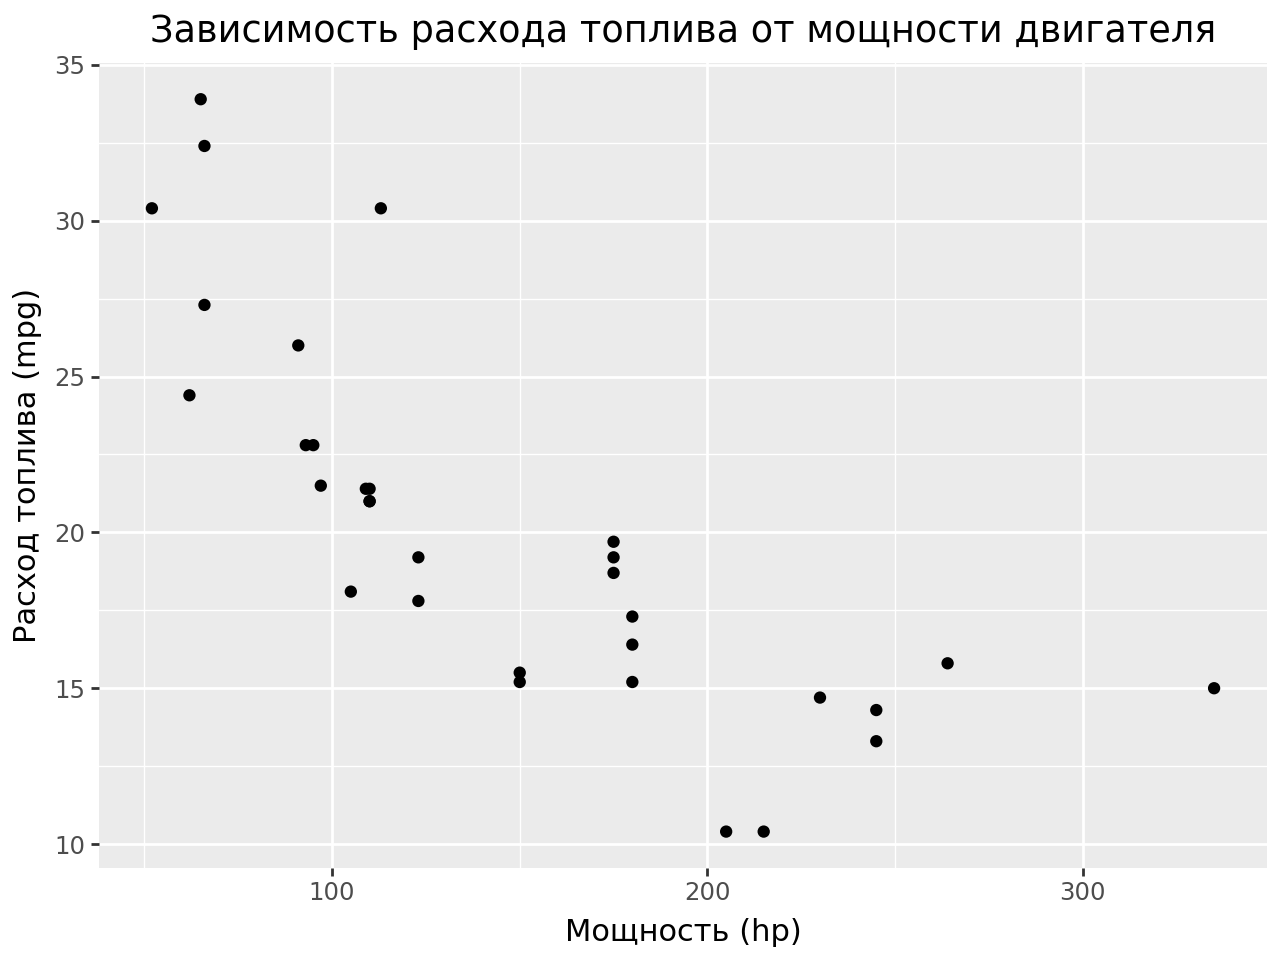

In [167]:
ggplot(df, aes(x='hp', y='mpg')) +\
geom_point() +\
labs(title="Зависимость расхода топлива от мощности двигателя", x="Мощность (hp)", y="Расход топлива (mpg)")

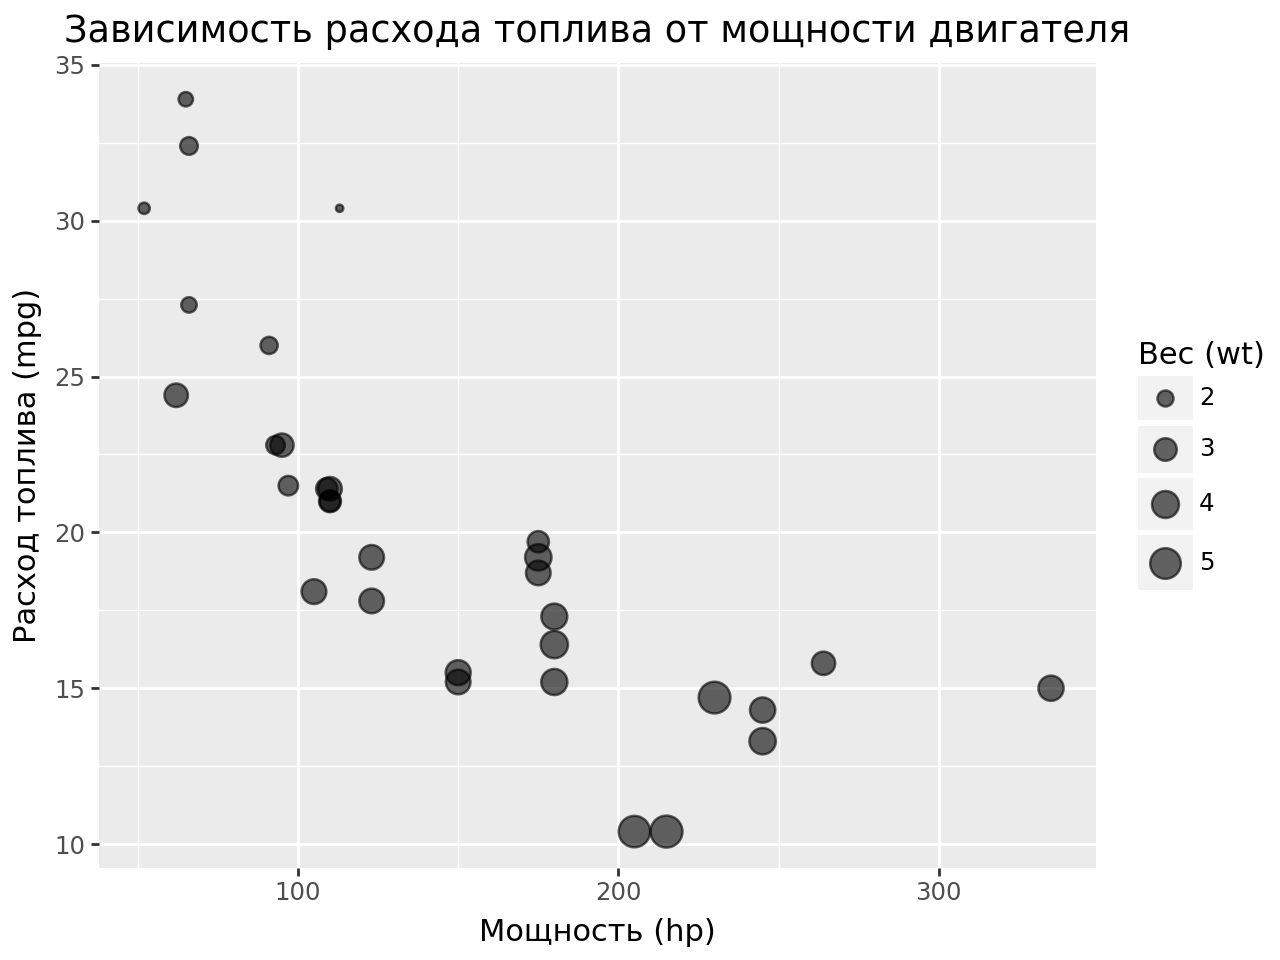

In [176]:
ggplot(df, aes(x='hp', y='mpg', size='wt')) +\
geom_point(alpha=0.6) +\
labs(title="Зависимость расхода топлива от мощности двигателя", x="Мощность (hp)", y="Расход топлива (mpg)", size="Вес (wt)")

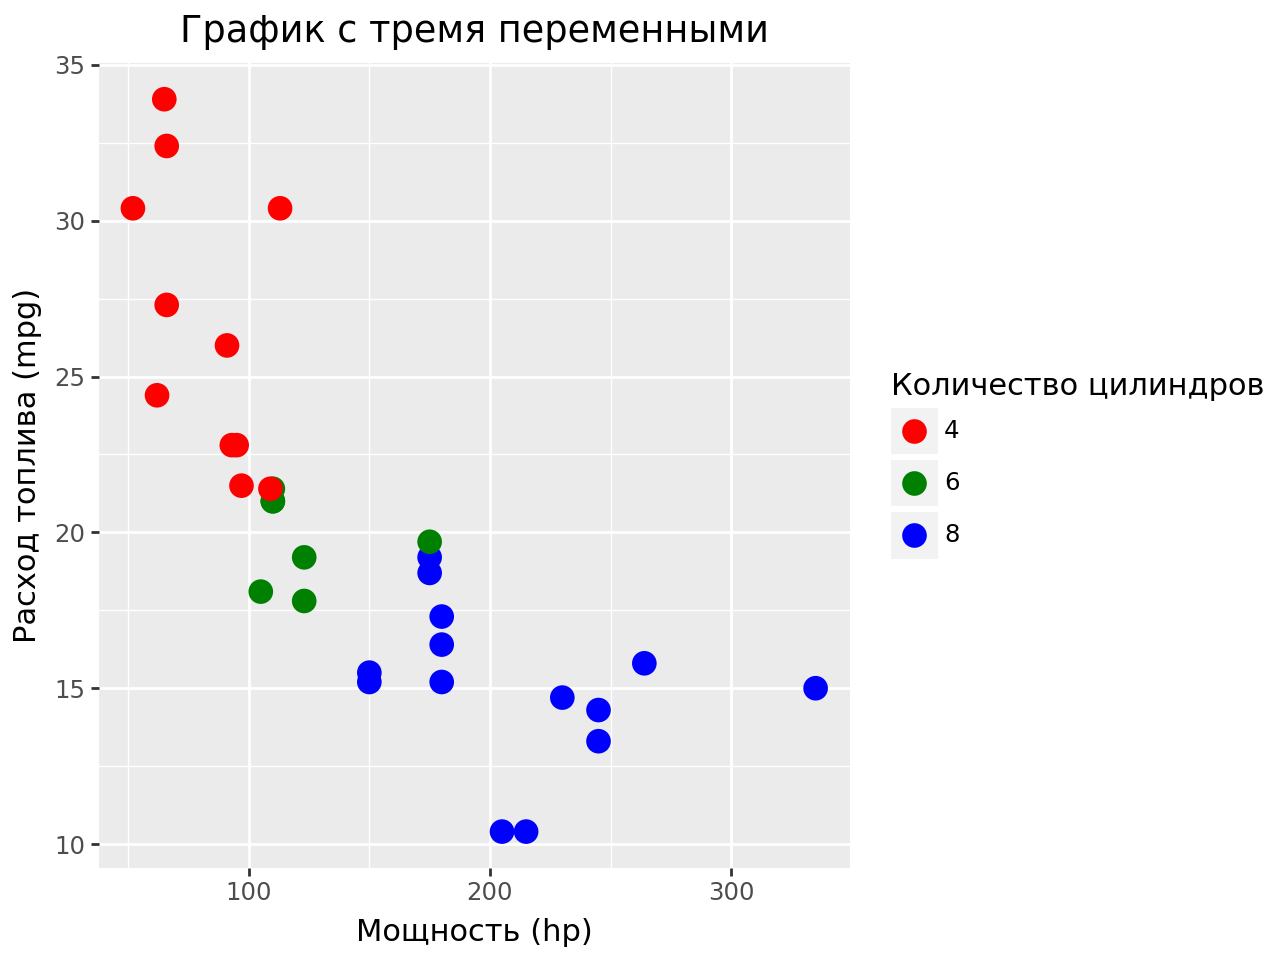

In [175]:
ggplot(df, aes(x='hp', y='mpg', color='factor(cyl)')) +\
geom_point(size=4) +\
scale_color_manual(values=["red", "green", "blue"]) +\
labs(title="График с тремя переменными", x="Мощность (hp)", y="Расход топлива (mpg)", color="Количество цилиндров")

Данной библиотекой я ранее не пользовался, могу сказать что она мне даже понравилась, много возможностей и легка в написании.